In [863]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns

In [864]:
df = pd.read_csv(r"Dataset_prep\Datasets\USD_INR1yr.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,19-06-2025,86.743,86.411,86.887,86.416,NaN,0.36%
1,18-06-2025,86.430,86.315,86.573,86.263,NaN,0.13%
2,17-06-2025,86.318,86.030,86.404,85.890,NaN,0.55%
3,16-06-2025,85.846,86.149,86.260,85.782,NaN,-0.30%
4,13-06-2025,86.108,86.164,86.217,85.924,NaN,0.62%
...,...,...,...,...,...,...,...
257,25-06-2024,83.403,83.439,83.510,83.394,NaN,-0.06%
258,24-06-2024,83.450,83.563,83.590,83.410,NaN,-0.13%
259,21-06-2024,83.558,83.654,83.654,83.484,NaN,-0.07%
260,20-06-2024,83.620,83.422,83.684,83.417,NaN,0.19%


In [865]:
df.isna().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.        262
Change %      0
dtype: int64

In [866]:
df.drop(labels="Vol.",  axis=1, inplace=True)
df

,Date,Price,Open,High,Low,Change %
0,19-06-2025,86.743,86.411,86.887,86.416,0.36%
1,18-06-2025,86.430,86.315,86.573,86.263,0.13%
2,17-06-2025,86.318,86.030,86.404,85.890,0.55%
3,16-06-2025,85.846,86.149,86.260,85.782,-0.30%
4,13-06-2025,86.108,86.164,86.217,85.924,0.62%
...,...,...,...,...,...,...
257,25-06-2024,83.403,83.439,83.510,83.394,-0.06%
258,24-06-2024,83.450,83.563,83.590,83.410,-0.13%
259,21-06-2024,83.558,83.654,83.654,83.484,-0.07%
260,20-06-2024,83.620,83.422,83.684,83.417,0.19%


In [867]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Month/Year"] = df["Date"].dt.strftime('%m-%Y')
df["Day"] = df["Date"].dt.day
#df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.strftime('%d-%m-%Y')
df = df[["Date", "Day", "Month", "Year", "Month/Year", "Price", "Open", "High", "Low", "Change %"]]
df

,Date,Day,Month,Year,Month/Year,Price,Open,High,Low,Change %
0,2025-06-19,19,6,2025,06-2025,86.743,86.411,86.887,86.416,0.36%
1,2025-06-18,18,6,2025,06-2025,86.430,86.315,86.573,86.263,0.13%
2,2025-06-17,17,6,2025,06-2025,86.318,86.030,86.404,85.890,0.55%
3,2025-06-16,16,6,2025,06-2025,85.846,86.149,86.260,85.782,-0.30%
4,2025-06-13,13,6,2025,06-2025,86.108,86.164,86.217,85.924,0.62%
...,...,...,...,...,...,...,...,...,...,...
257,2024-06-25,25,6,2024,06-2024,83.403,83.439,83.510,83.394,-0.06%
258,2024-06-24,24,6,2024,06-2024,83.450,83.563,83.590,83.410,-0.13%
259,2024-06-21,21,6,2024,06-2024,83.558,83.654,83.654,83.484,-0.07%
260,2024-06-20,20,6,2024,06-2024,83.620,83.422,83.684,83.417,0.19%


In [868]:
df = df.sort_values('Date')

INR vs USD Trends over the last year

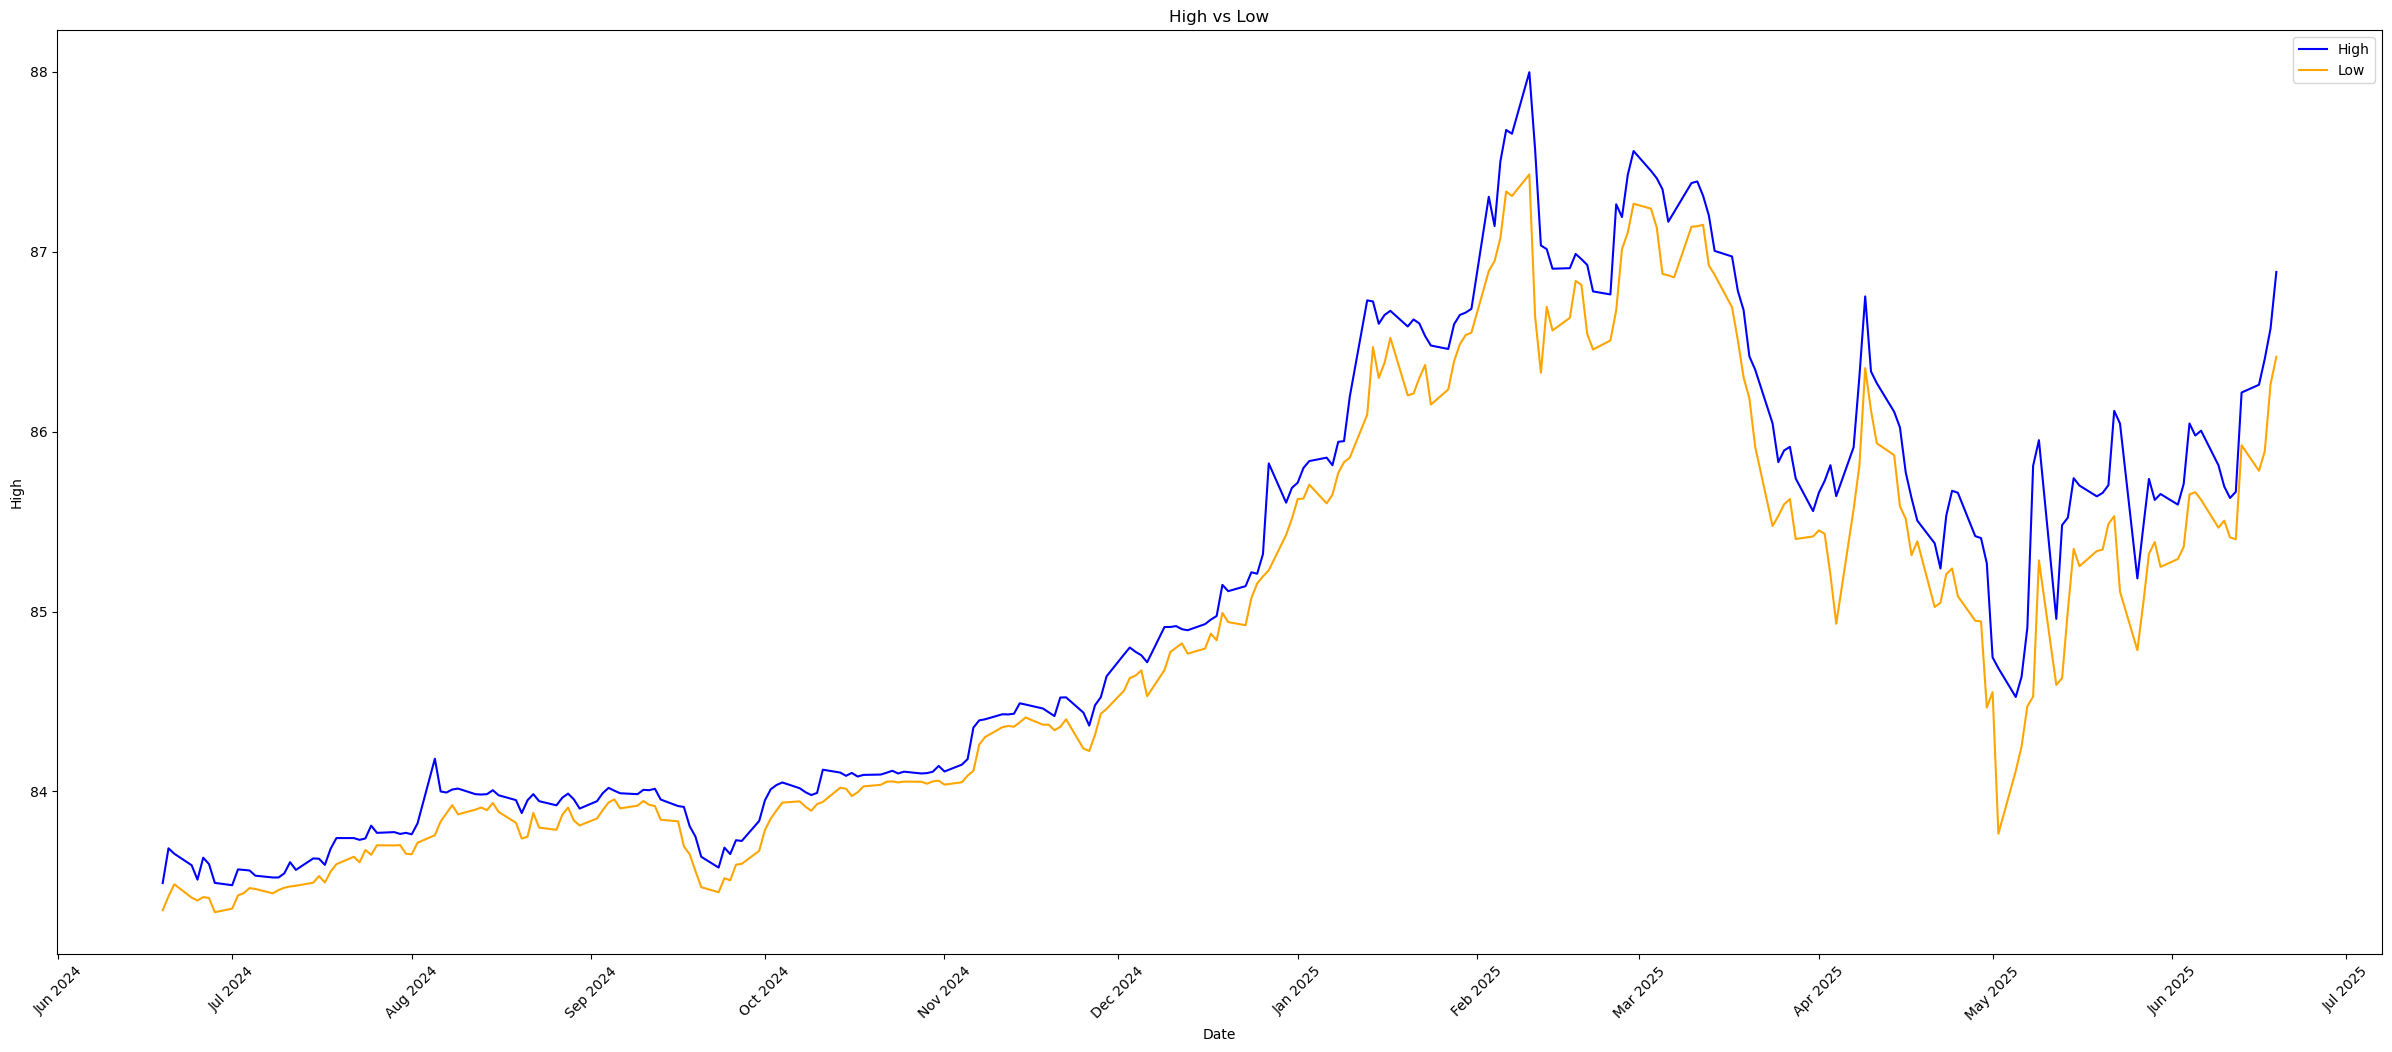

In [869]:
plt.figure(figsize=(30,12))

#sns.lineplot(x=df["Date"], y=df["Price"], color="r", label="Price", errorbar=None)
#sns.lineplot(x=df["Date"], y=df["Open"], color="g", label="Open", errorbar=None)
sns.lineplot(x=df["Date"], y=df["High"], color="b", label="High", errorbar=None)
sns.lineplot(x=df["Date"], y=df["Low"], color="orange", label="Low", errorbar=None)

ax = plt.gca() 
ax.xaxis.set_major_locator(mdates.MonthLocator()) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title("High vs Low")
plt.xticks(rotation=45)
plt.show()

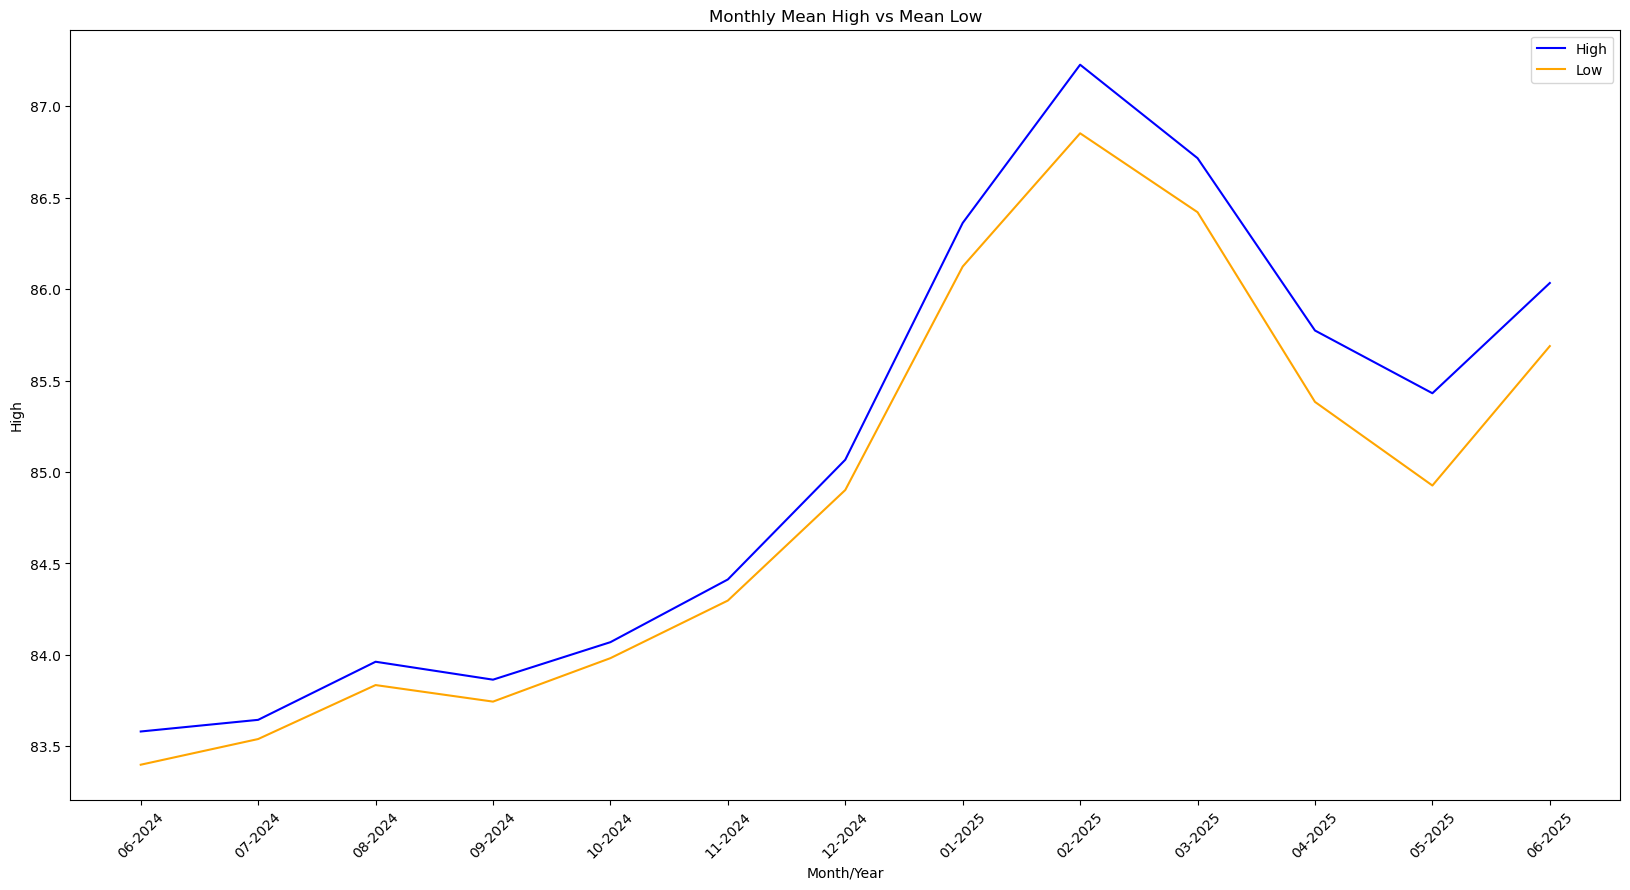

In [870]:
plt.figure(figsize=(20,10))

#sns.lineplot(x=df["Month/Year"], y=df["Price"], estimator="mean" ,color="r", label="Price", errorbar=None)
#sns.lineplot(x=df["Month/Year"], y=df["Open"], estimator="mean" ,color="g", label="Open", errorbar=None)
sns.lineplot(x=df["Month/Year"], y=df["High"], estimator="mean" ,color="b", label="High", errorbar=None)
sns.lineplot(x=df["Month/Year"], y=df["Low"], estimator="mean" ,color="orange", label="Low", errorbar=None)

plt.title("Monthly Mean High vs Mean Low")
plt.xticks(rotation=45)
plt.show()

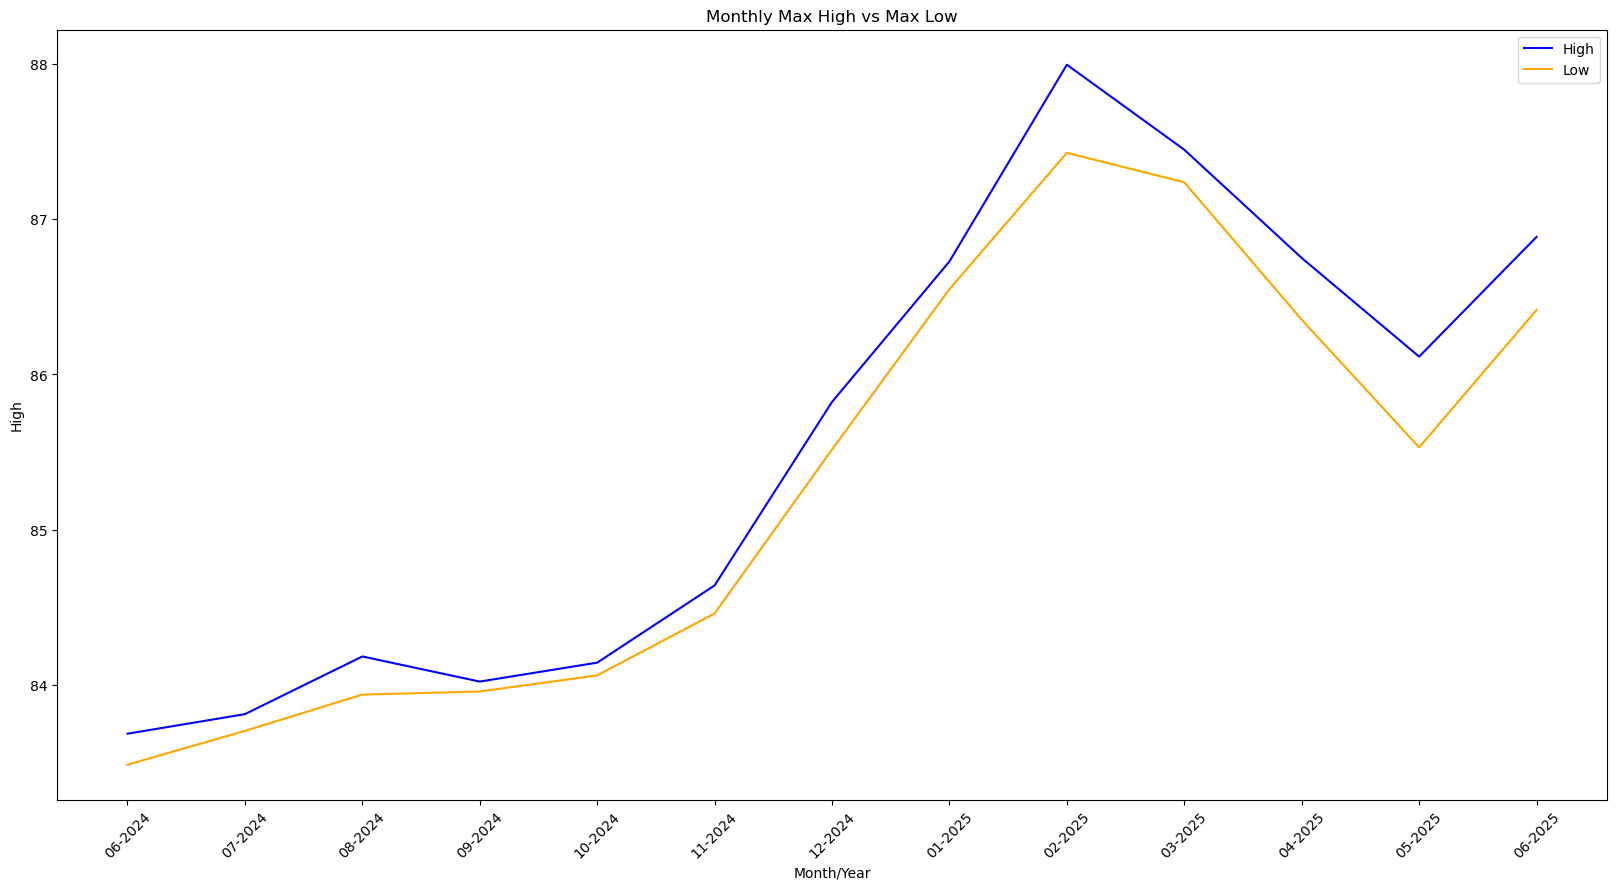

In [871]:
plt.figure(figsize=(20,10))

#sns.lineplot(x=df["Month/Year"], y=df["Price"], estimator="max" ,color="r", label="Price", errorbar=None)
#sns.lineplot(x=df["Month/Year"], y=df["Open"], estimator="max" ,color="g", label="Open", errorbar=None)
sns.lineplot(x=df["Month/Year"], y=df["High"], estimator="max" ,color="b", label="High", errorbar=None)
sns.lineplot(x=df["Month/Year"], y=df["Low"], estimator="max" ,color="orange", label="Low", errorbar=None)

plt.title("Monthly Max High vs Max Low")
plt.xticks(rotation=45)
plt.show()

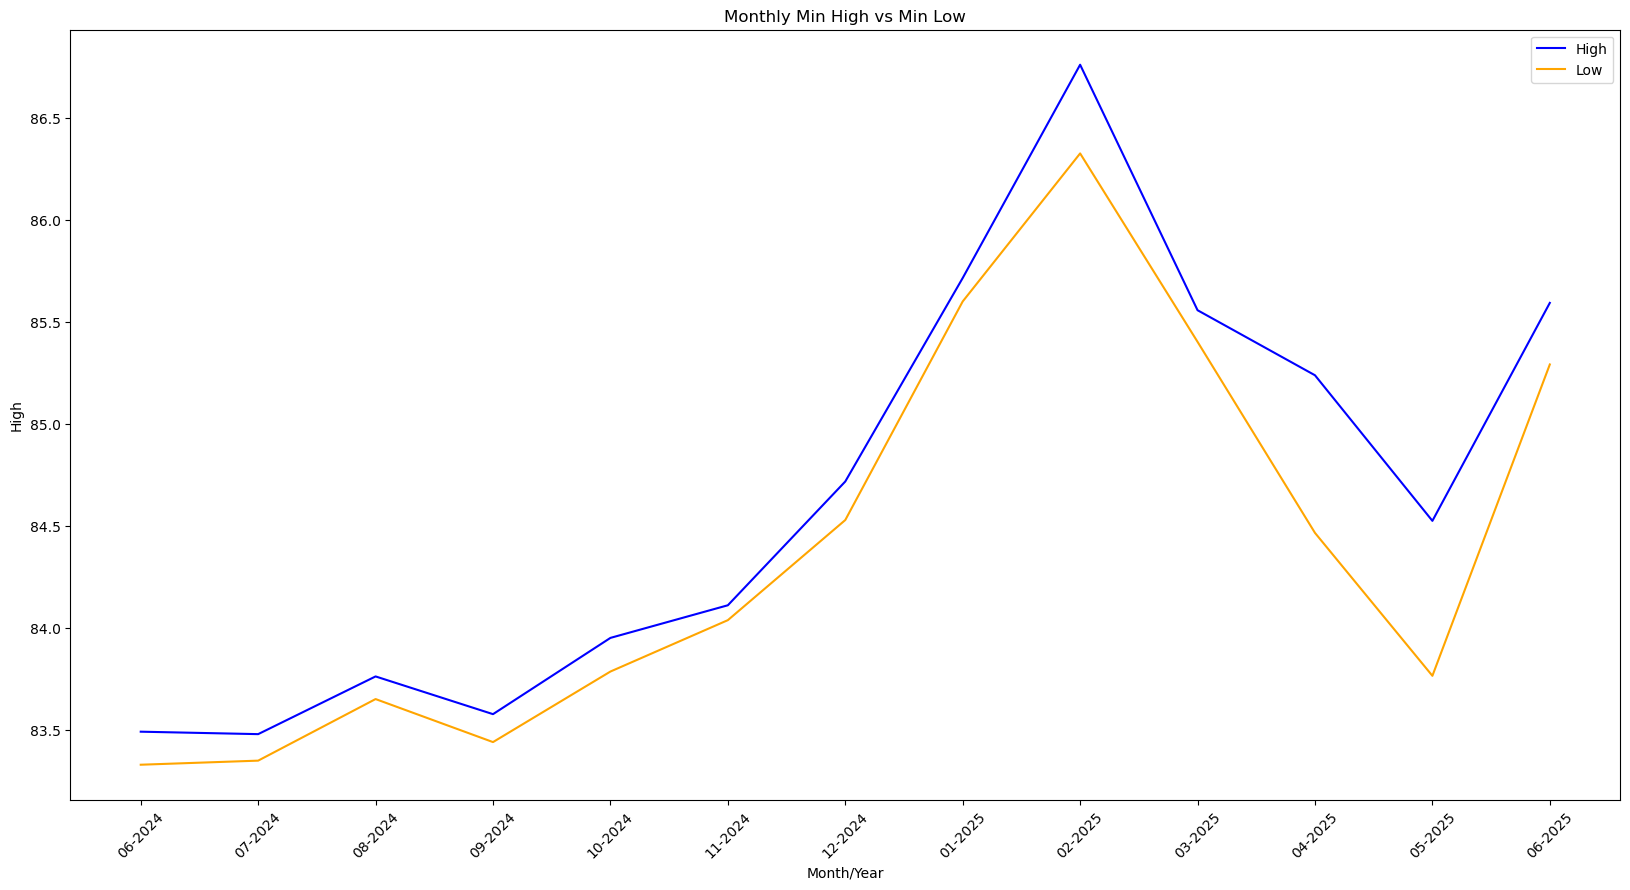

In [872]:
plt.figure(figsize=(20,10))

#sns.lineplot(x=df["Month/Year"], y=df["Price"], estimator="min" ,color="r", label="Price", errorbar=None)
#sns.lineplot(x=df["Month/Year"], y=df["Open"], estimator="min" ,color="g", label="Open", errorbar=None)
sns.lineplot(x=df["Month/Year"], y=df["High"], estimator="min" ,color="b", label="High", errorbar=None)
sns.lineplot(x=df["Month/Year"], y=df["Low"], estimator="min" ,color="orange", label="Low", errorbar=None)

plt.title("Monthly Min High vs Min Low")
plt.xticks(rotation=45)
plt.show()

In [873]:
df['Change %'] = df['Change %'].str.rstrip('%').astype(float)

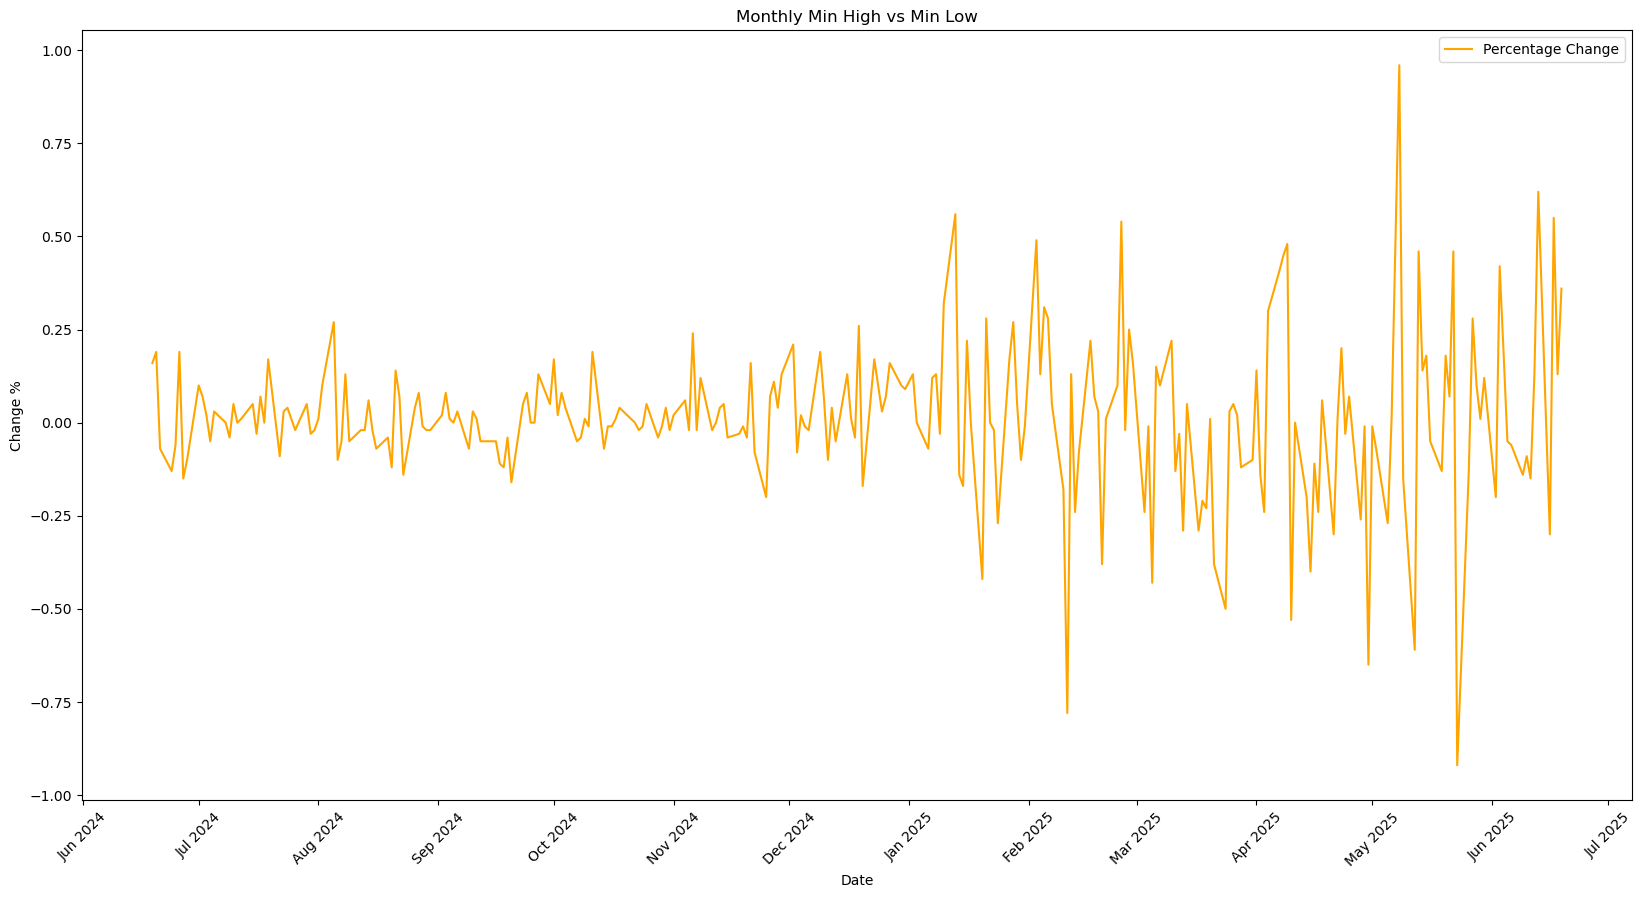

In [874]:
plt.figure(figsize=(20,10))

sns.lineplot(x=df["Date"], y=df["Change %"], color="orange", label="Percentage Change", errorbar=None)

ax = plt.gca() 
ax.xaxis.set_major_locator(mdates.MonthLocator()) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title("Monthly Min High vs Min Low")
plt.xticks(rotation=45)
plt.show()

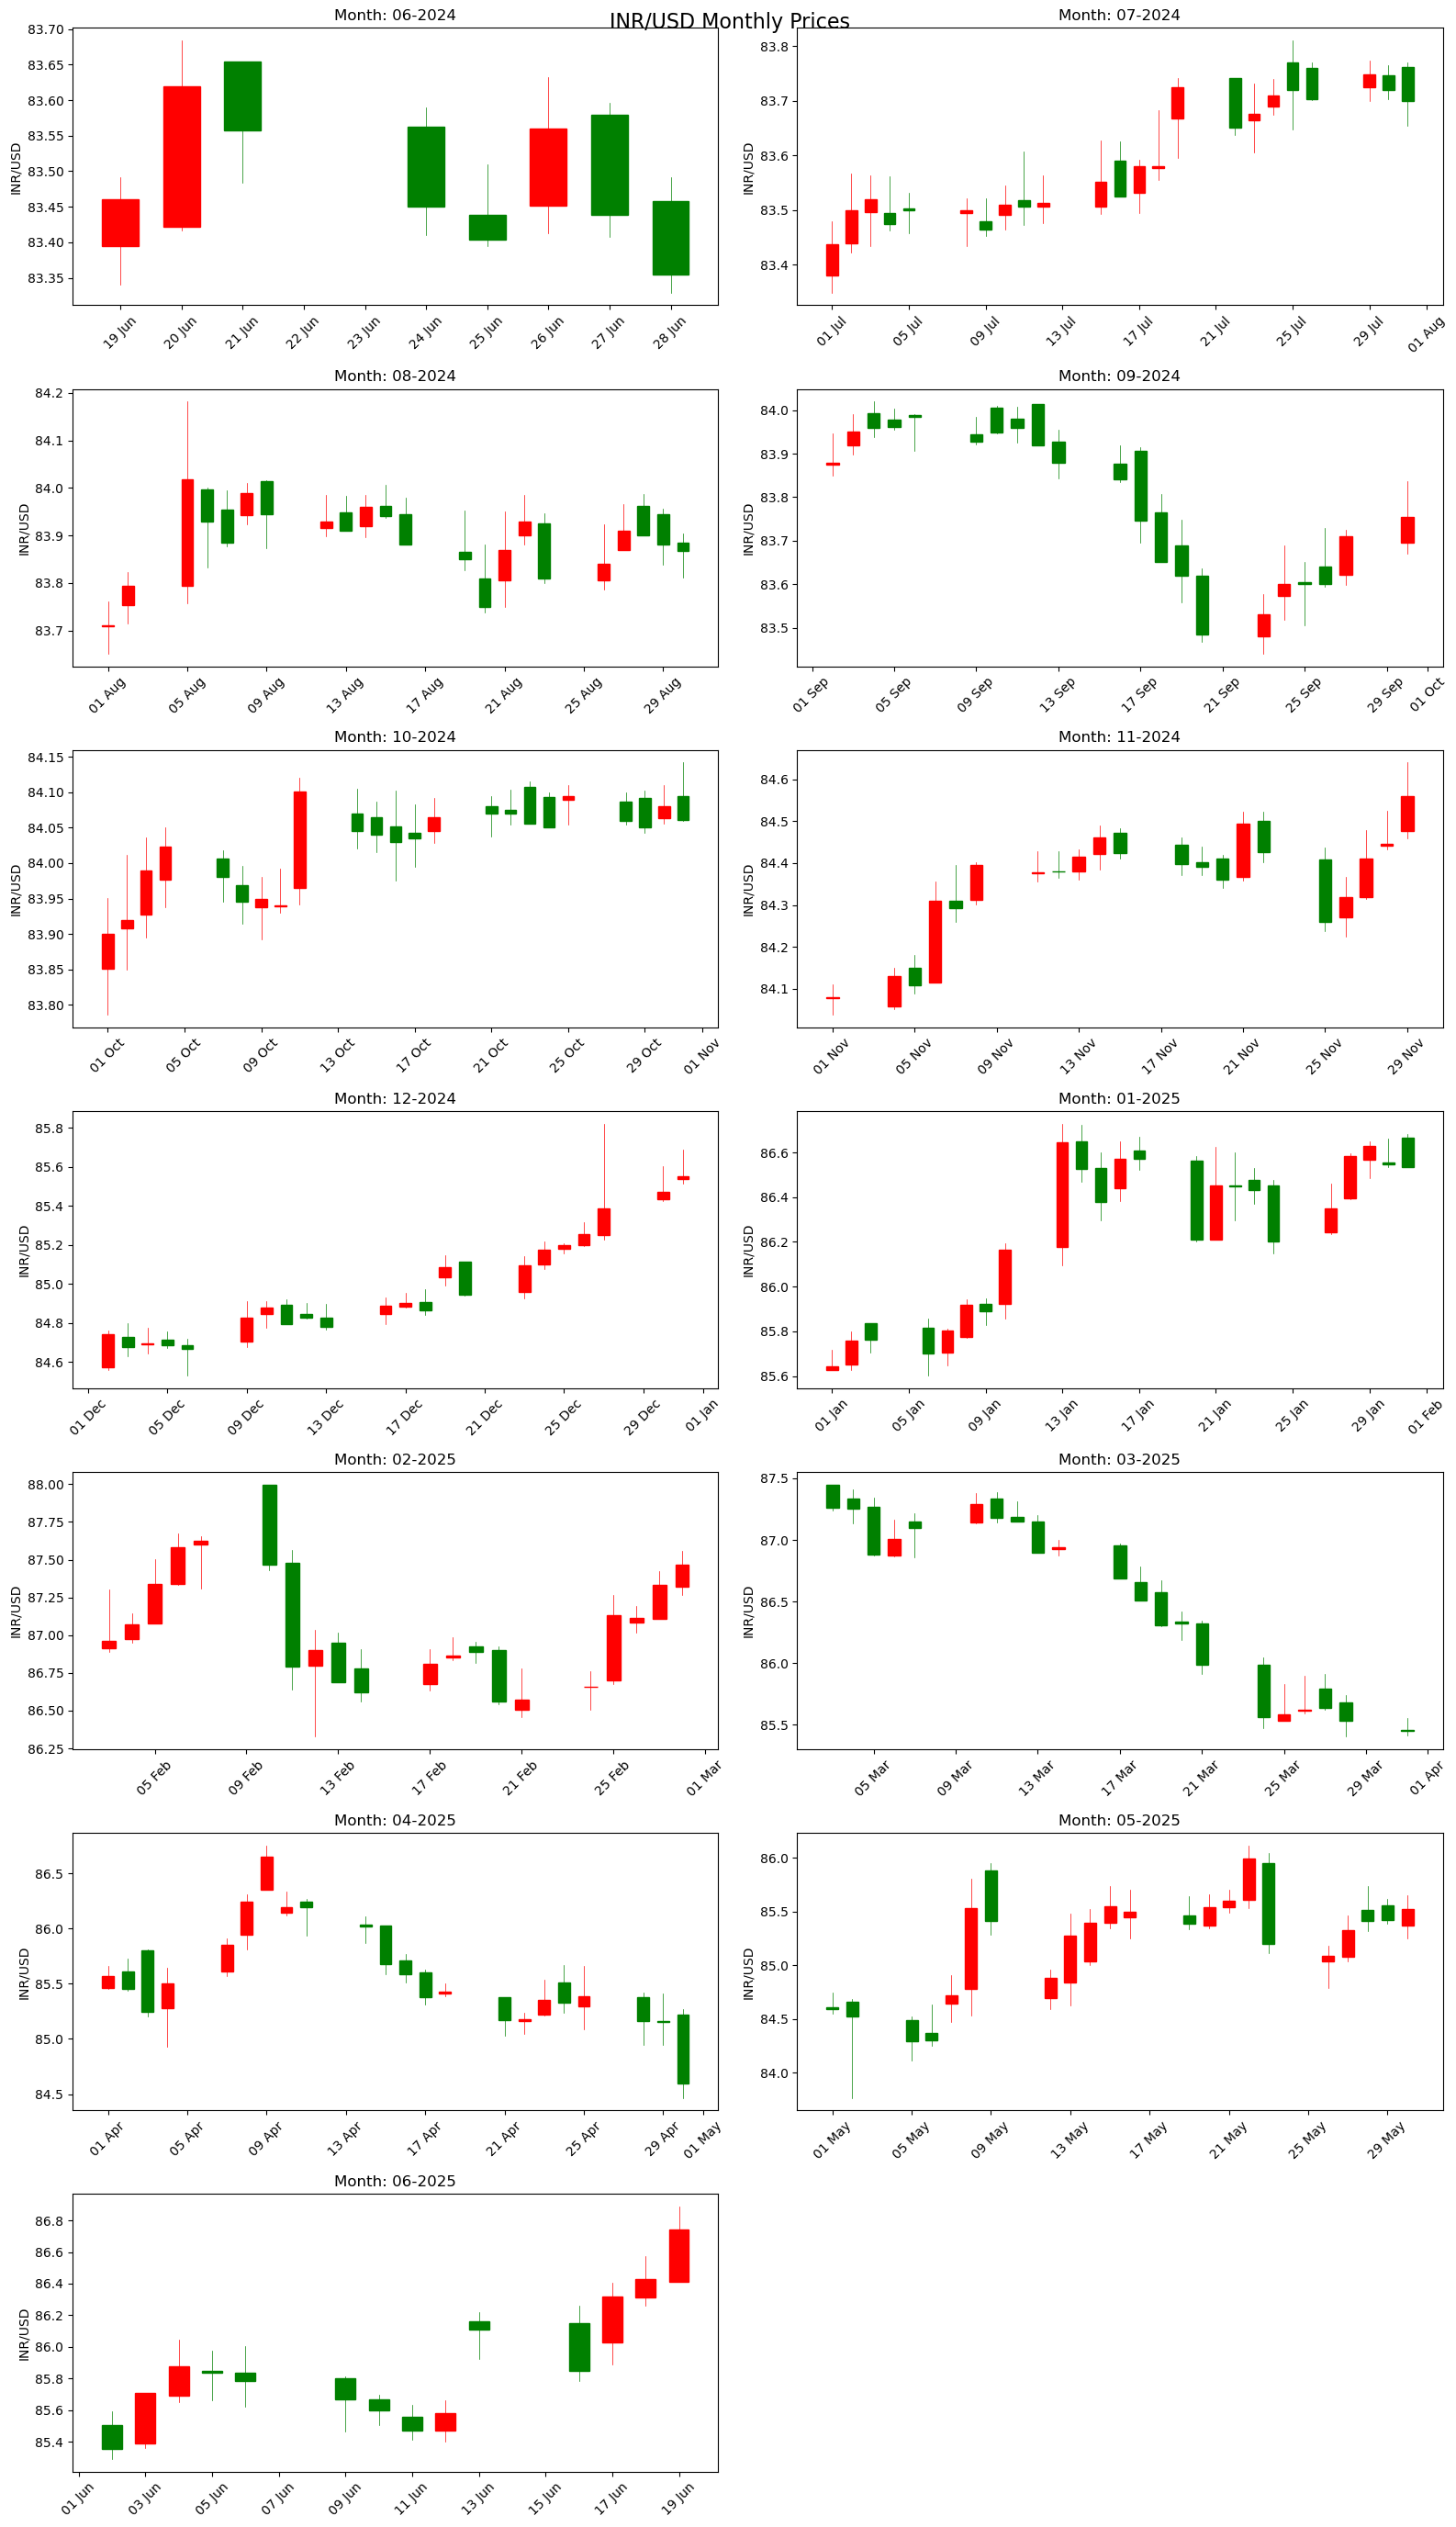

In [875]:
df['Date_Num'] = mdates.date2num(df['Date'])

months = df['Month/Year'].unique()
n_months = len(months)

cols = 2
rows = (n_months // cols) + (n_months % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(cols*8, rows*4), squeeze=False)

for i, month in enumerate(months):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    
    df_month = df[df['Month/Year'] == month][['Date_Num', 'Open', 'High', 'Low', 'Price']].copy()
    ohlc = df_month.values  

    candlestick_ohlc(ax, ohlc, width=0.6, colorup='r', colordown='g')

    ax.set_title(f'Month: {month}', fontsize=12)
    ax.set_ylabel("INR/USD")
    
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
    ax.tick_params(axis='x', rotation=45)

for j in range(i+1, rows*cols):
    fig.delaxes(axes[j//cols, j%cols])

plt.suptitle("INR/USD Monthly Prices", fontsize=16)
plt.tight_layout()
plt.show()


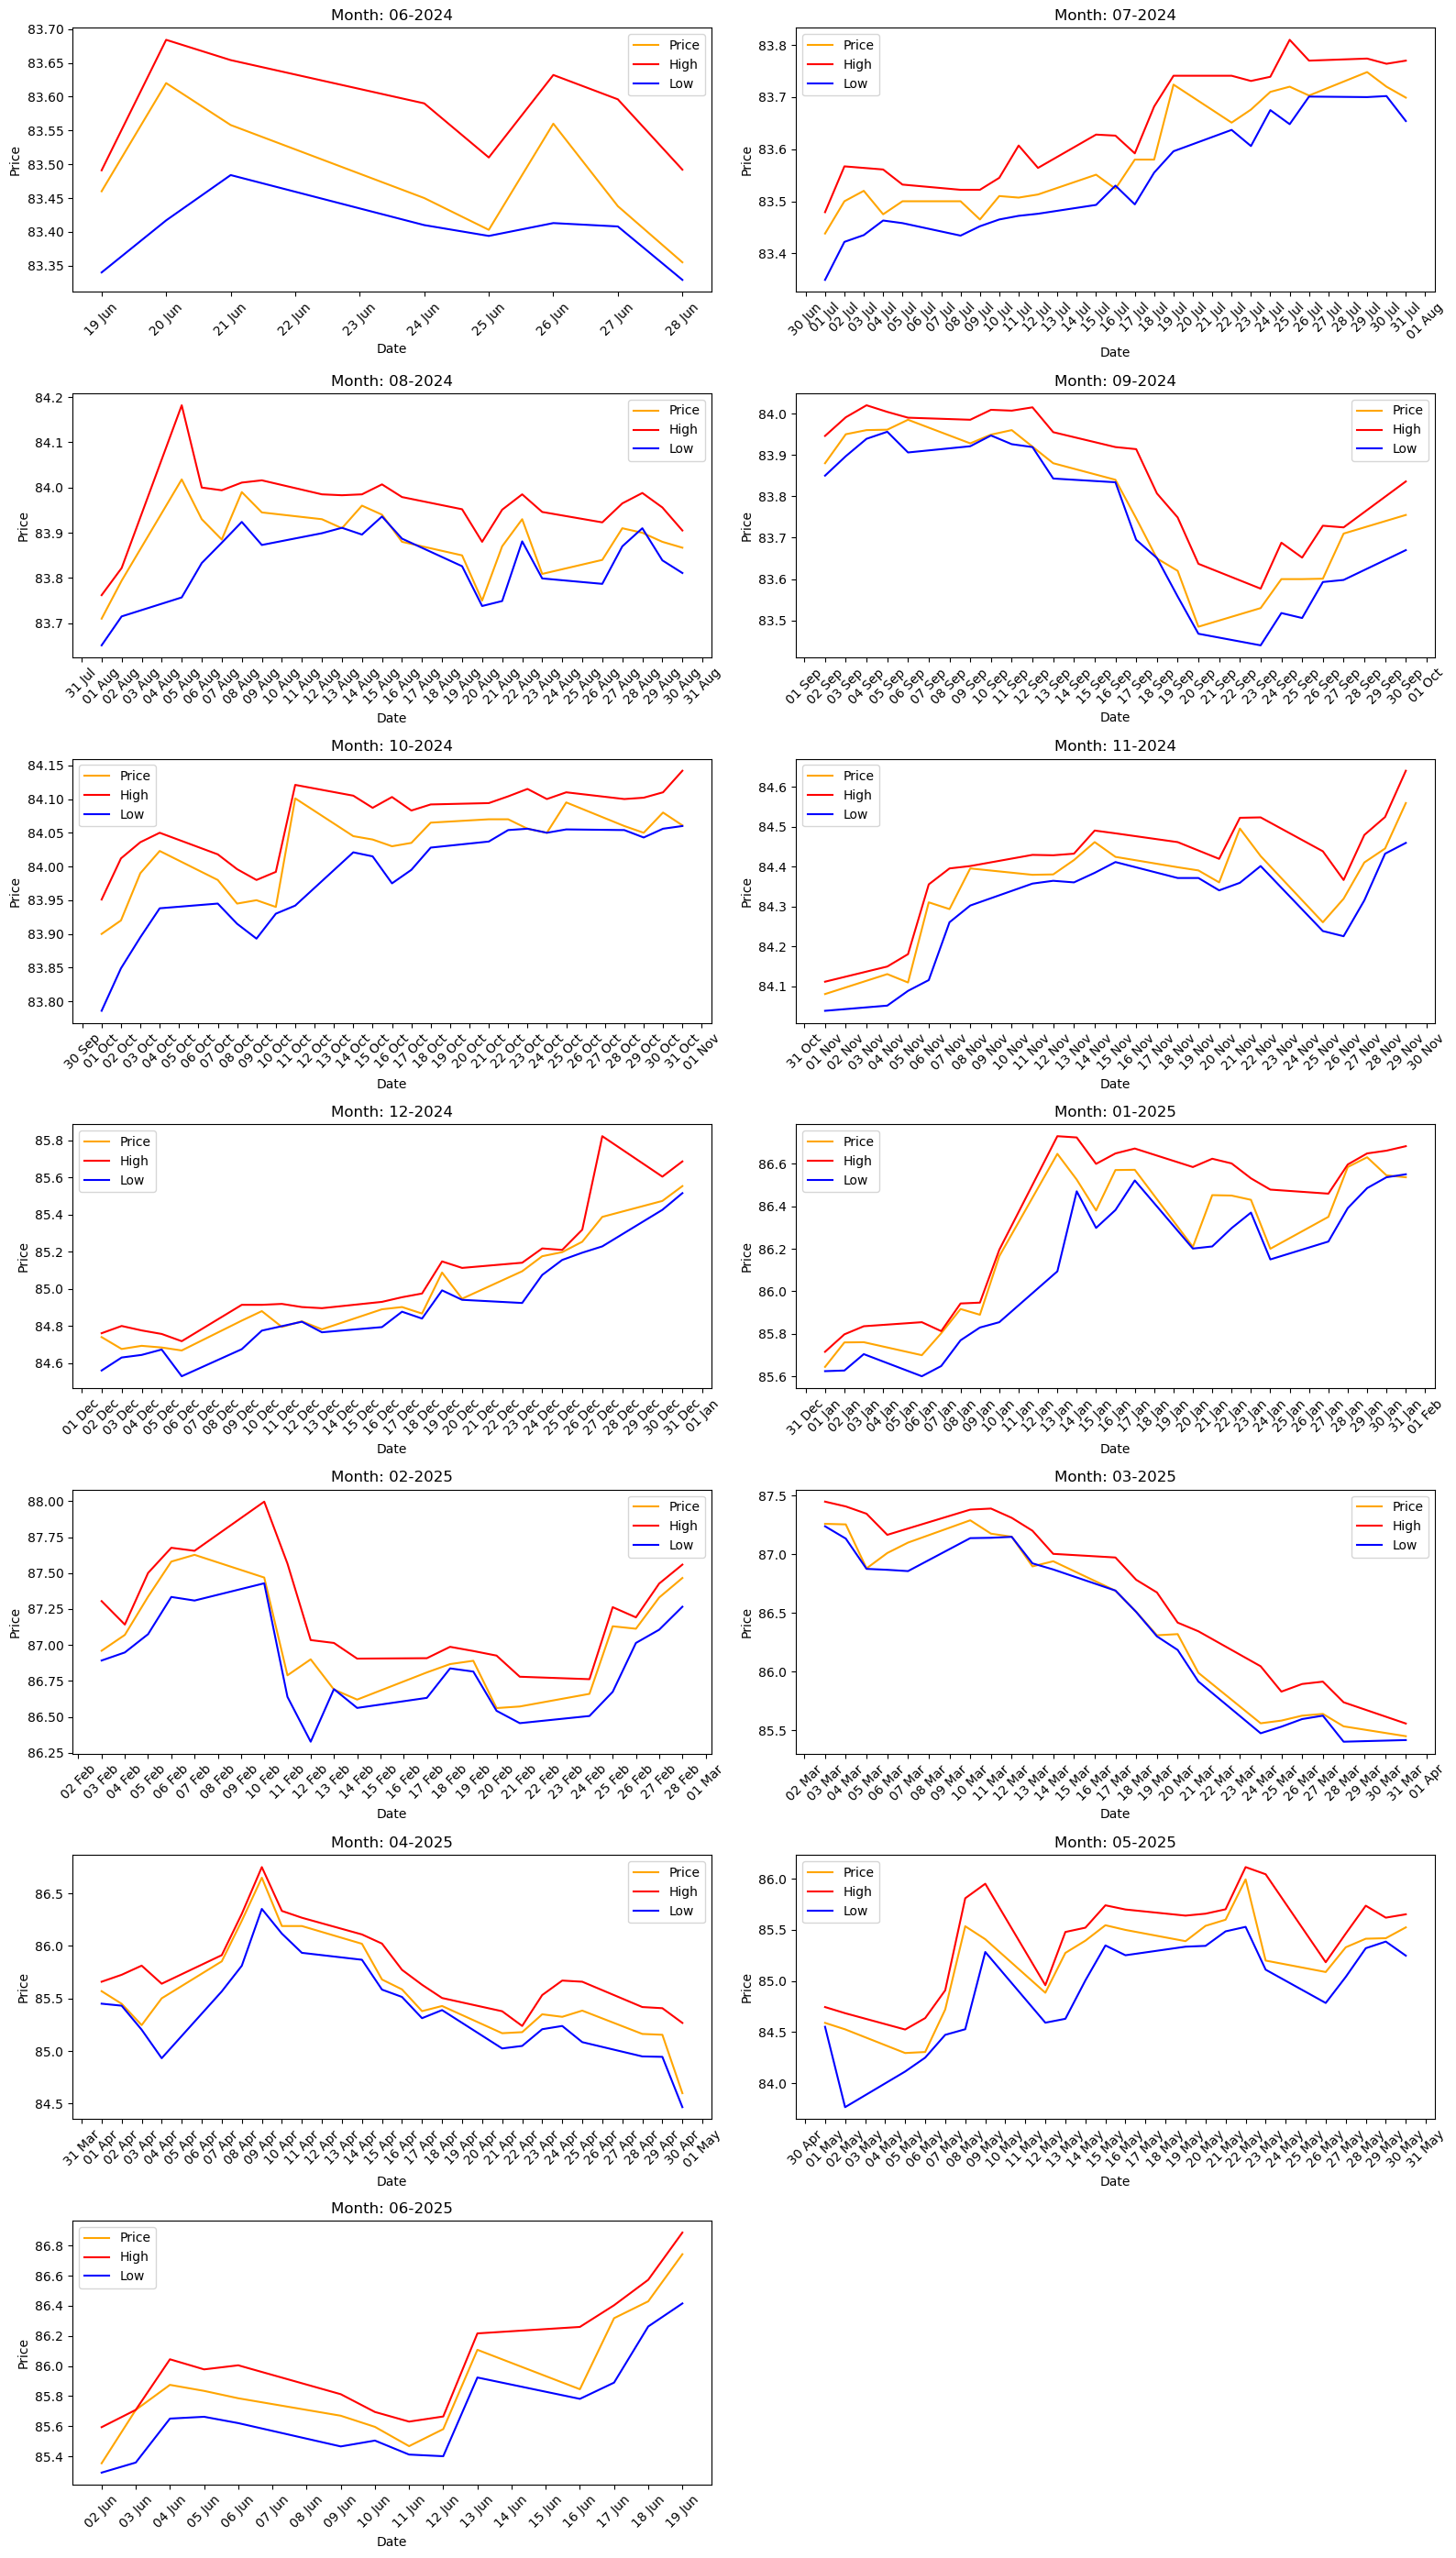

In [876]:
months = df['Month/Year'].unique()
n_months = len(months)

cols = 2
rows = (n_months // cols) + (n_months % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(cols*8, rows*4), squeeze=False)

for i, month in enumerate(months):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    
    df_month = df[df['Month/Year'] == month]
    
    sns.lineplot(x=df_month["Date"], y=df_month["Price"], color="orange", errorbar=None, label="Price", ax=ax)
    sns.lineplot(x=df_month["Date"], y=df_month["High"], color="r", errorbar=None, label="High", ax=ax)
    sns.lineplot(x=df_month["Date"], y=df_month["Low"], color="b", errorbar=None, label="Low", ax=ax)
    
    ax.set_title(f'Month: {month}', fontsize=12)
    ax.set_xlabel("Date")
    
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
    ax.tick_params(axis='x', rotation=45)

for j in range(i+1, rows*cols):
    fig.delaxes(axes[j//cols, j%cols])

plt.tight_layout()
plt.show()

Constant Rise in USD Index is a major factor for the rising INR Prices

Trump Tariffs introduced on April 2nd resulting in the spike before RBI intervention

Recent Iran-Israel conflict has been causing fluctuations in Crude oil prices explaining the patterns on June 2025

Negative FII Purchases/Sales and Higher CPI in India is also contributing largely to the increase in price rates

CPI (Inflation Rate) w.r.t INR and USD Index

In [877]:
df_2k = pd.read_csv("USD_INR_Monthly_2000.csv")
df_2k

,Date,Price,Open,High,Low,Vol.,Change %
0,01-06-2025,86.358,85.504,86.887,85.240,NaN,0.97%
1,01-05-2025,85.525,84.609,86.115,83.765,NaN,1.09%
2,01-04-2025,84.599,85.459,86.751,84.466,NaN,-1.01%
3,01-03-2025,85.460,87.449,87.449,85.398,NaN,-2.30%
4,01-02-2025,87.471,86.916,87.997,86.327,NaN,1.05%
...,...,...,...,...,...,...,...
301,01-05-2000,44.575,43.727,44.815,43.625,NaN,2.12%
302,01-04-2000,43.650,43.650,43.715,43.590,NaN,0.11%
303,01-03-2000,43.600,43.660,43.672,43.500,NaN,-0.03%
304,01-02-2000,43.614,43.623,43.704,43.504,NaN,-0.03%


In [878]:
cpi = pd.read_csv("ind_usa_cpi_data.csv")
cpi

,Date,IND_CPI,USA_CPI
0,1953-04-30,2.632456,12.198729
1,1953-05-31,2.732490,12.244589
2,1953-06-30,2.821993,12.290449
3,1953-07-31,2.861480,12.290449
4,1953-08-31,2.845685,12.336309
...,...,...,...
860,2024-12-31,222.430730,144.736088
861,2025-01-31,220.154059,145.683553
862,2025-02-28,219.129557,146.330636
863,2025-03-31,218.560390,146.659451


In [879]:
df_2k["Date"] = pd.to_datetime(df_2k["Date"], format="%d-%m-%Y")
cpi["Date"] = pd.to_datetime(cpi["Date"], format="%Y-%m-%d")

In [880]:
cpi["Date"] = cpi["Date"] + pd.Timedelta(days=1)
cpi 

,Date,IND_CPI,USA_CPI
0,1953-05-01,2.632456,12.198729
1,1953-06-01,2.732490,12.244589
2,1953-07-01,2.821993,12.290449
3,1953-08-01,2.861480,12.290449
4,1953-09-01,2.845685,12.336309
...,...,...,...
860,2025-01-01,222.430730,144.736088
861,2025-02-01,220.154059,145.683553
862,2025-03-01,219.129557,146.330636
863,2025-04-01,218.560390,146.659451


In [881]:
sample_df = cpi.merge(df_2k, on="Date", how="inner")
sample_df

,Date,IND_CPI,USA_CPI,Price,Open,High,Low,Vol.,Change %
0,2000-01-01,56.381952,77.182185,43.625,43.505,43.775,43.375,NaN,0.29%
1,2000-02-01,56.305611,77.411485,43.614,43.623,43.704,43.504,NaN,-0.03%
2,2000-03-01,56.497780,77.870084,43.600,43.660,43.672,43.500,NaN,-0.03%
3,2000-04-01,57.695548,78.512122,43.650,43.650,43.715,43.590,NaN,0.11%
4,2000-05-01,58.543199,78.557982,44.575,43.727,44.815,43.625,NaN,2.12%
...,...,...,...,...,...,...,...,...,...
300,2025-01-01,222.430730,144.736088,86.561,85.625,86.729,85.601,NaN,1.18%
301,2025-02-01,220.154059,145.683553,87.471,86.916,87.997,86.327,NaN,1.05%
302,2025-03-01,219.129557,146.330636,85.460,87.449,87.449,85.398,NaN,-2.30%
303,2025-04-01,218.560390,146.659451,84.599,85.459,86.751,84.466,NaN,-1.01%


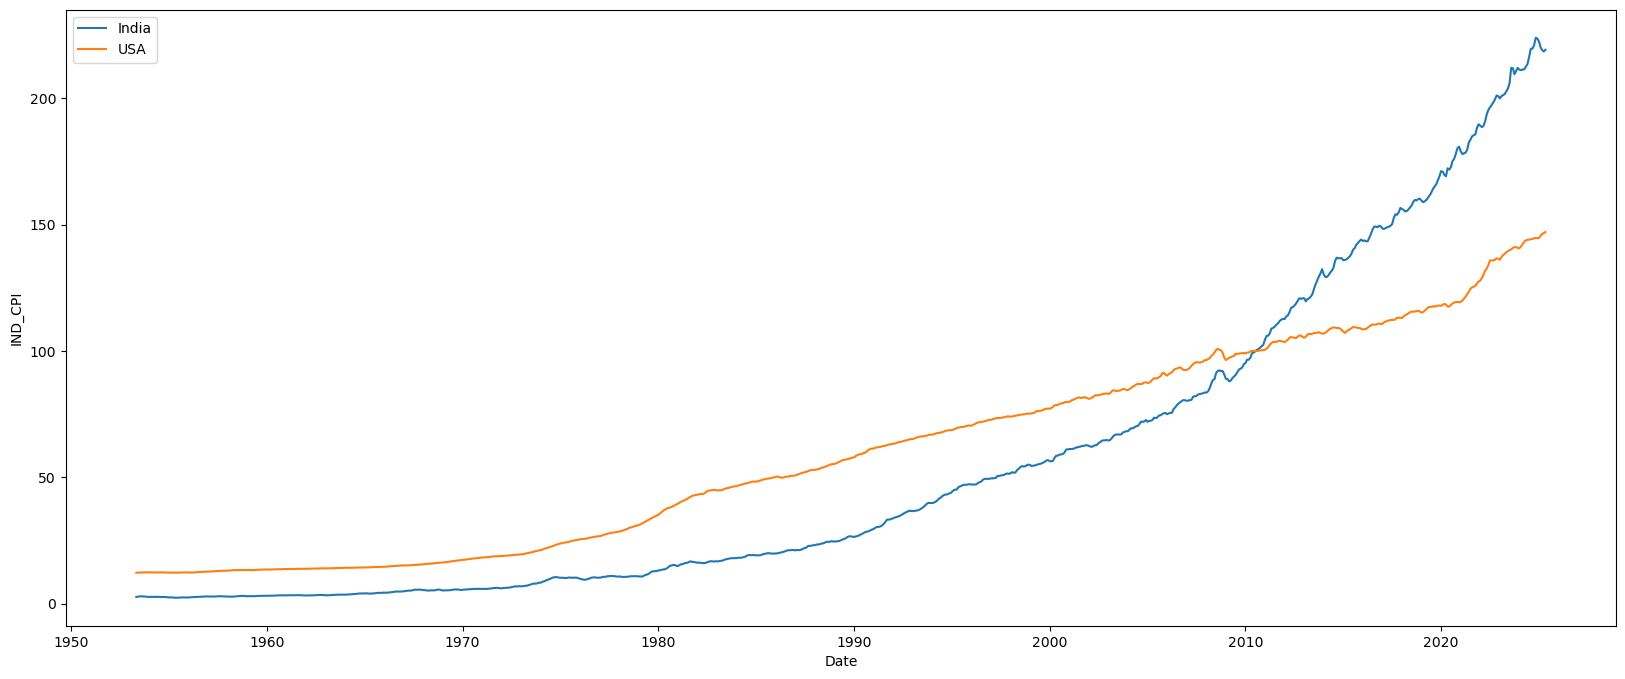

In [882]:
plt.figure(figsize=(20,8))

sns.lineplot(x=cpi["Date"], y=cpi["IND_CPI"],label="India")
sns.lineplot(x=cpi["Date"], y=cpi["USA_CPI"], label="USA")

plt.show()

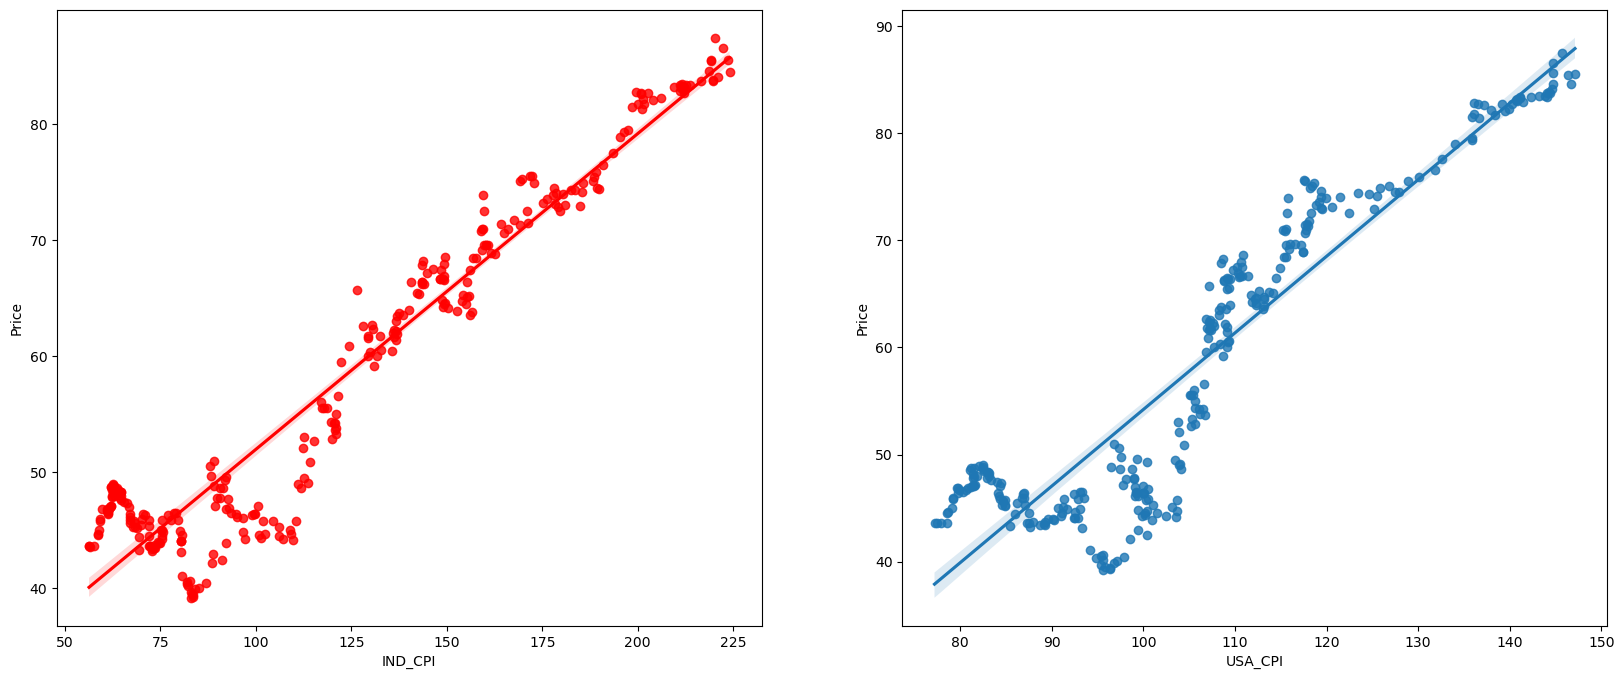

In [883]:
fig, axes = plt.subplots(1, 2, figsize=(20,8), squeeze=False)

sns.regplot(data=sample_df, x="IND_CPI", y="Price", color="r", ax=axes[0,0])
sns.regplot(data=sample_df, x="USA_CPI", y="Price", ax=axes[0,1])
plt.show()

In [930]:
corr, p = pearsonr(sample_df["Price"], sample_df["IND_CPI"])
print(f"Correlation between INR and CPI: {corr:.2f}, p-value: {p:.4f}")

Correlation between INR and CPI: 0.96, p-value: 0.0000


In [884]:
index = pd.read_csv("US Dollar Index Historical Data.csv")
index

,Date,Price,Open,High,Low,Vol.,Change %
0,06/19/2025,98.90,98.88,99.16,98.75,0.00K,0.00%
1,06/18/2025,98.90,98.87,99.01,98.48,0.00K,0.09%
2,06/17/2025,98.82,98.19,98.87,98.02,0.00K,0.84%
3,06/16/2025,98.00,98.26,98.36,97.68,0.00K,-0.19%
4,06/13/2025,98.18,97.81,98.59,97.62,NaN,0.27%
...,...,...,...,...,...,...,...
254,06/25/2024,105.61,105.51,105.78,105.37,NaN,0.13%
255,06/24/2024,105.47,105.83,105.90,105.37,NaN,-0.31%
256,06/21/2024,105.80,105.64,105.92,105.54,NaN,0.20%
257,06/20/2024,105.59,105.20,105.67,105.20,NaN,0.32%


In [885]:
index["Date"] = pd.to_datetime(index["Date"], format="%m/%d/%Y")
index = index.sort_values(by="Date")
index

,Date,Price,Open,High,Low,Vol.,Change %
258,2024-06-19,105.25,105.26,105.34,105.15,NaN,0.00%
257,2024-06-20,105.59,105.20,105.67,105.20,NaN,0.32%
256,2024-06-21,105.80,105.64,105.92,105.54,NaN,0.20%
255,2024-06-24,105.47,105.83,105.90,105.37,NaN,-0.31%
254,2024-06-25,105.61,105.51,105.78,105.37,NaN,0.13%
...,...,...,...,...,...,...,...
4,2025-06-13,98.18,97.81,98.59,97.62,NaN,0.27%
3,2025-06-16,98.00,98.26,98.36,97.68,0.00K,-0.19%
2,2025-06-17,98.82,98.19,98.87,98.02,0.00K,0.84%
1,2025-06-18,98.90,98.87,99.01,98.48,0.00K,0.09%


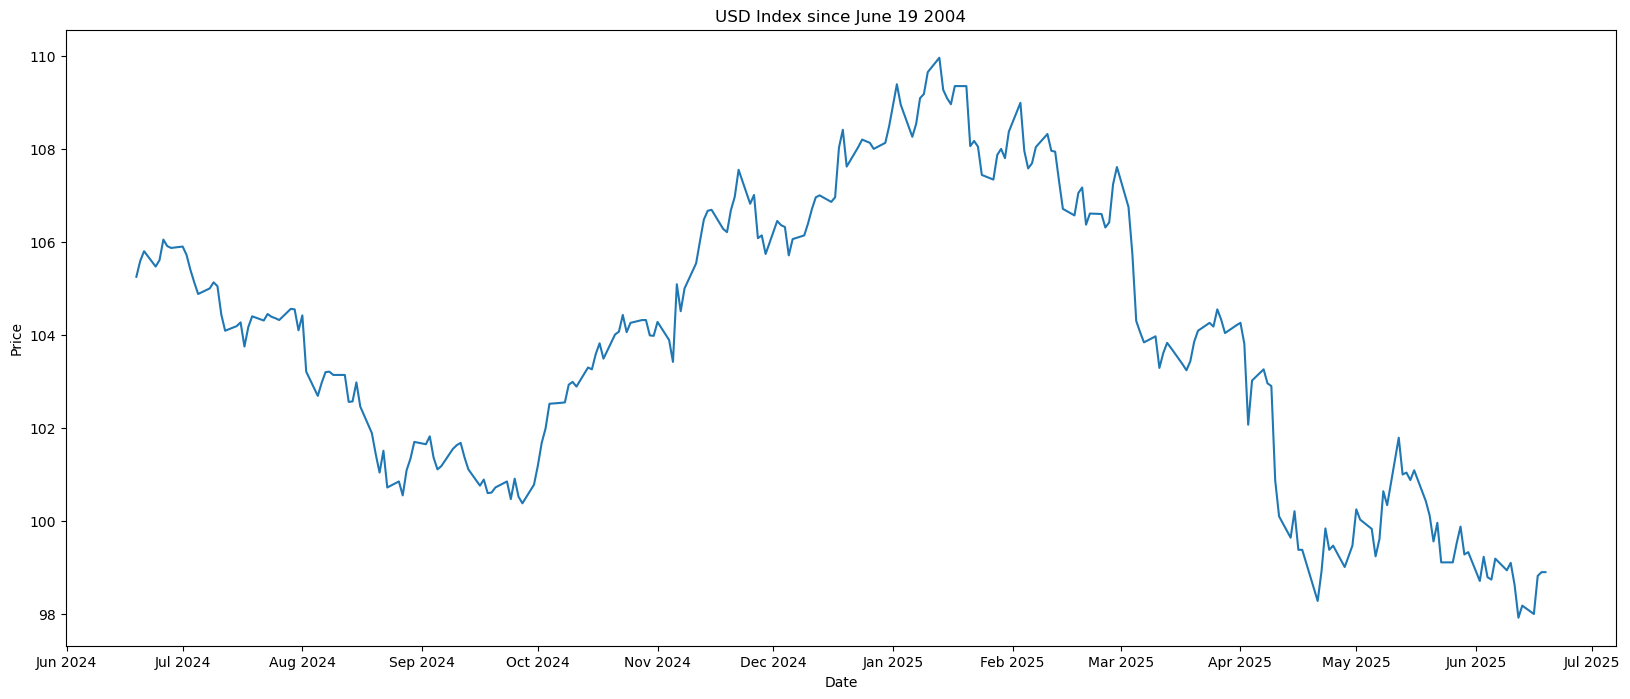

In [886]:
plt.figure(figsize=(20,8))

sns.lineplot(x=index["Date"], y=index["Price"])

ax = plt.gca() 
ax.xaxis.set_major_locator(mdates.MonthLocator()) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title("USD Index since June 19 2004")
plt.show()

In [887]:
us_idx_inr = df.merge(index, on="Date", how="inner")
us_idx_inr

,Date,Day,Month,Year,Month/Year,Price_x,Open_x,High_x,Low_x,Change %_x,Date_Num,Price_y,Open_y,High_y,Low_y,Vol.,Change %_y
0,2024-06-19,19,6,2024,06-2024,83.460,83.394,83.491,83.340,0.16,19893.0,105.25,105.26,105.34,105.15,NaN,0.00%
1,2024-06-20,20,6,2024,06-2024,83.620,83.422,83.684,83.417,0.19,19894.0,105.59,105.20,105.67,105.20,NaN,0.32%
2,2024-06-21,21,6,2024,06-2024,83.558,83.654,83.654,83.484,-0.07,19895.0,105.80,105.64,105.92,105.54,NaN,0.20%
3,2024-06-24,24,6,2024,06-2024,83.450,83.563,83.590,83.410,-0.13,19898.0,105.47,105.83,105.90,105.37,NaN,-0.31%
4,2024-06-25,25,6,2024,06-2024,83.403,83.439,83.510,83.394,-0.06,19899.0,105.61,105.51,105.78,105.37,NaN,0.13%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2025-06-13,13,6,2025,06-2025,86.108,86.164,86.217,85.924,0.62,20252.0,98.18,97.81,98.59,97.62,NaN,0.27%
255,2025-06-16,16,6,2025,06-2025,85.846,86.149,86.260,85.782,-0.30,20255.0,98.00,98.26,98.36,97.68,0.00K,-0.19%
256,2025-06-17,17,6,2025,06-2025,86.318,86.030,86.404,85.890,0.55,20256.0,98.82,98.19,98.87,98.02,0.00K,0.84%
257,2025-06-18,18,6,2025,06-2025,86.430,86.315,86.573,86.263,0.13,20257.0,98.90,98.87,99.01,98.48,0.00K,0.09%


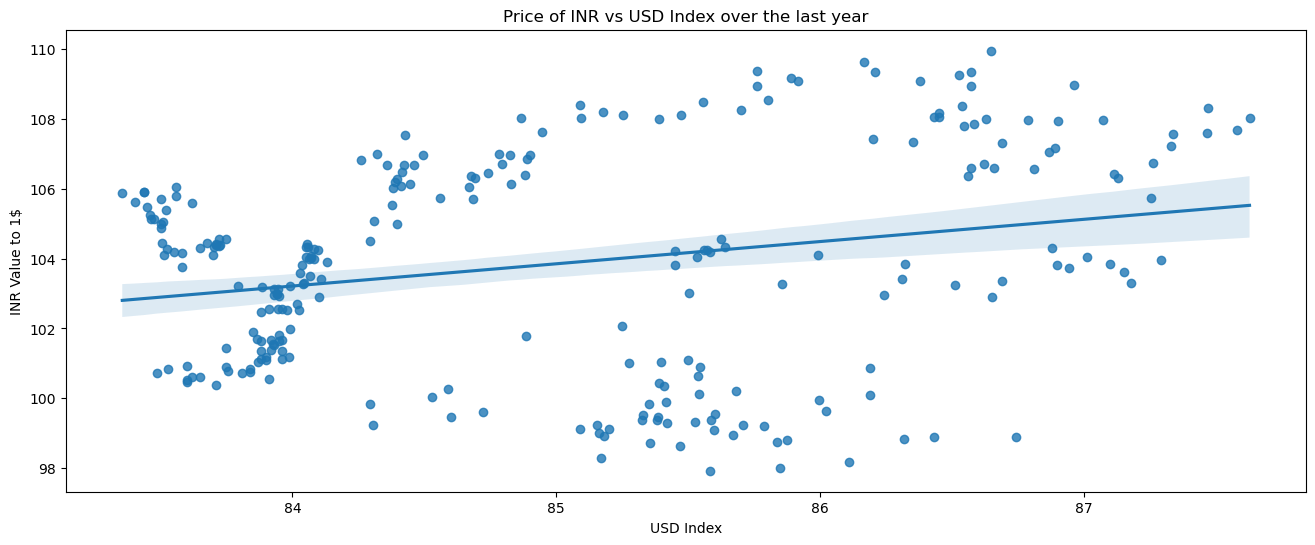

In [888]:
plt.figure(figsize=(16,6))
sns.regplot(x=us_idx_inr["Price_x"], y=us_idx_inr["Price_y"])

plt.xlabel("USD Index")
plt.ylabel("INR Value to 1$")
plt.title("Price of INR vs USD Index over the last year")
plt.show()


In [ ]:
corr, p = pearsonr(us_idx_inr["Price_x"], us_idx_inr["Price_y"])
print(f"Correlation between INR and USD Index over the last year: {corr:.2f}, p-value: {p:.3f}")

Correlation between INR and USD Index: 0.25, p-value: 0.000


In [889]:
index_monthly = pd.read_csv("US_idx_monthly_2K.csv")
index_monthly

,Date,Price,Open,High,Low,Vol.,Change %
0,06/01/2025,98.10,99.38,99.43,97.60,0.01K,-1.24%
1,05/01/2025,99.33,99.65,101.98,98.69,0.02K,-0.14%
2,04/01/2025,99.47,104.18,104.37,97.92,0.00K,-4.55%
3,03/01/2025,104.21,107.56,107.56,103.20,0.02K,-3.16%
4,02/01/2025,107.61,108.50,109.88,106.13,0.01K,-0.70%
...,...,...,...,...,...,...,...
301,05/01/2000,108.74,109.90,112.86,108.18,NaN,-1.27%
302,04/01/2000,110.14,105.61,110.32,104.23,NaN,4.46%
303,03/01/2000,105.44,106.22,106.61,104.48,NaN,-0.45%
304,02/01/2000,105.92,104.98,106.86,102.92,NaN,0.75%


In [890]:
index_monthly["Date"] = pd.to_datetime(index_monthly["Date"], format="%m/%d/%Y")
index_monthly

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-06-01,98.10,99.38,99.43,97.60,0.01K,-1.24%
1,2025-05-01,99.33,99.65,101.98,98.69,0.02K,-0.14%
2,2025-04-01,99.47,104.18,104.37,97.92,0.00K,-4.55%
3,2025-03-01,104.21,107.56,107.56,103.20,0.02K,-3.16%
4,2025-02-01,107.61,108.50,109.88,106.13,0.01K,-0.70%
...,...,...,...,...,...,...,...
301,2000-05-01,108.74,109.90,112.86,108.18,NaN,-1.27%
302,2000-04-01,110.14,105.61,110.32,104.23,NaN,4.46%
303,2000-03-01,105.44,106.22,106.61,104.48,NaN,-0.45%
304,2000-02-01,105.92,104.98,106.86,102.92,NaN,0.75%


In [891]:
index_monthly_cpi = index_monthly.merge(sample_df, on="Date", how="inner")
index_monthly_cpi

,Date,Price_x,Open_x,High_x,Low_x,Vol._x,Change %_x,IND_CPI,USA_CPI,Price_y,Open_y,High_y,Low_y,Vol._y,Change %_y
0,2025-05-01,99.33,99.65,101.98,98.69,0.02K,-0.14%,219.243391,147.116216,85.525,84.609,86.115,83.765,NaN,1.09%
1,2025-04-01,99.47,104.18,104.37,97.92,0.00K,-4.55%,218.560390,146.659451,84.599,85.459,86.751,84.466,NaN,-1.01%
2,2025-03-01,104.21,107.56,107.56,103.20,0.02K,-3.16%,219.129557,146.330636,85.460,87.449,87.449,85.398,NaN,-2.30%
3,2025-02-01,107.61,108.50,109.88,106.13,0.01K,-0.70%,220.154059,145.683553,87.471,86.916,87.997,86.327,NaN,1.05%
4,2025-01-01,108.37,108.53,110.18,106.97,0.02K,-0.11%,222.430730,144.736088,86.561,85.625,86.729,85.601,NaN,1.18%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2000-05-01,108.74,109.90,112.86,108.18,NaN,-1.27%,58.543199,78.557982,44.575,43.727,44.815,43.625,NaN,2.12%
301,2000-04-01,110.14,105.61,110.32,104.23,NaN,4.46%,57.695548,78.512122,43.650,43.650,43.715,43.590,NaN,0.11%
302,2000-03-01,105.44,106.22,106.61,104.48,NaN,-0.45%,56.497780,77.870084,43.600,43.660,43.672,43.500,NaN,-0.03%
303,2000-02-01,105.92,104.98,106.86,102.92,NaN,0.75%,56.305611,77.411485,43.614,43.623,43.704,43.504,NaN,-0.03%


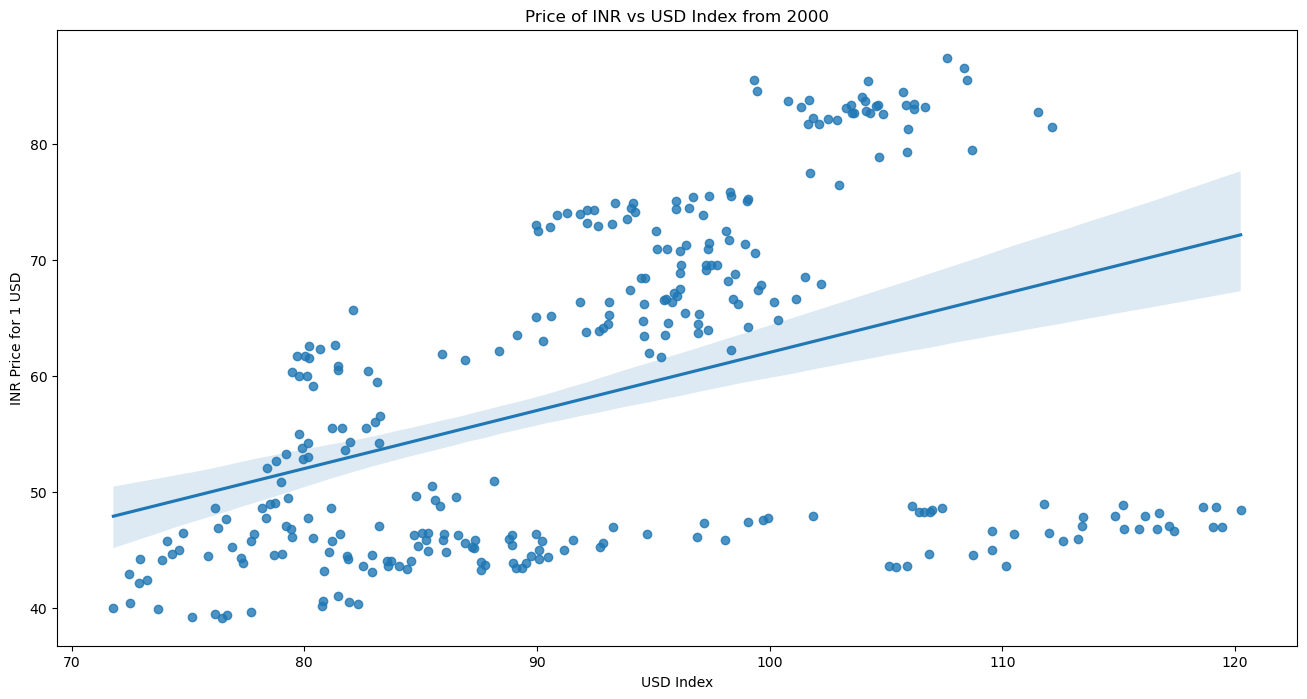

In [892]:
plt.figure(figsize=(16,8))
sns.regplot(x=index_monthly_cpi["Price_x"], y=index_monthly_cpi["Price_y"])

plt.xlabel("USD Index")
plt.ylabel("INR Price for 1 USD")
plt.title("Price of INR vs USD Index from 2000")
plt.show()

In [933]:
corr, p = pearsonr(index_monthly_cpi["Price_x"],index_monthly_cpi["Price_y"])
print(f"Correlation between INR and USD Index over the last 25 yrs: {corr:.2f}, p-value: {p:.3f}")

Correlation between INR and USD Index over the last 25 yrs: 0.41, p-value: 0.000


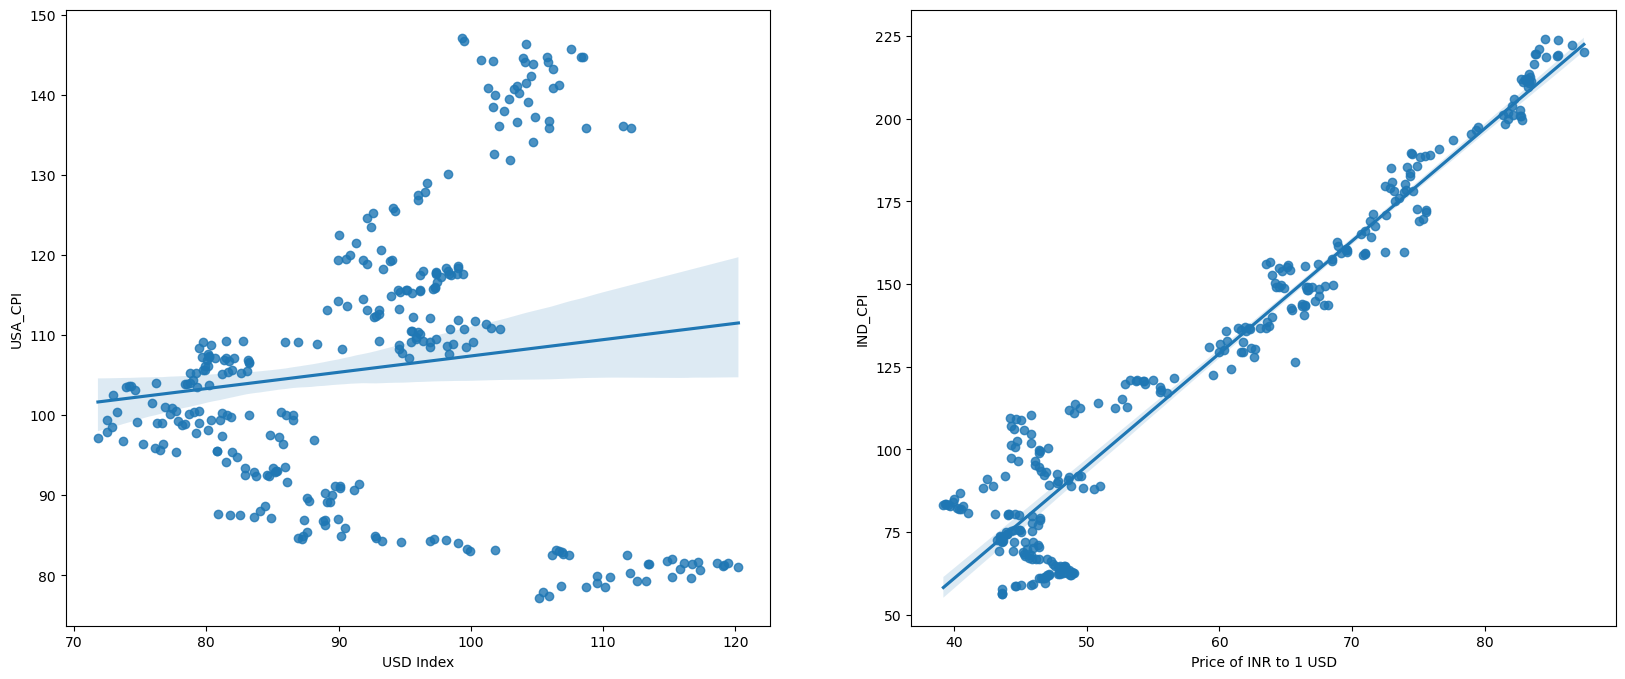

In [893]:
fig, axes = plt.subplots(1, 2, figsize=(20,8), squeeze=False)

sns.regplot(x=index_monthly_cpi["Price_x"], y=index_monthly_cpi["USA_CPI"], ax=axes[0,0])
sns.regplot(x=index_monthly_cpi["Price_y"], y=index_monthly_cpi["IND_CPI"], ax=axes[0,1])

axes[0,0].set_xlabel("USD Index")
axes[0,1].set_xlabel("Price of INR to 1 USD")
plt.show()

Trade-Balance and FII and DII

In [894]:
trade_balance = pd.read_csv("India-Trade-Balance-Billions-of-US-2025-06-23-20-22.csv")
# https://data.worldbank.org/indicator/BN.GSR.GNFS.CD?locations=IN
trade_balance

,Year,Trade Balance
0,1960,-8.778009e+08
1,1961,-6.489006e+08
2,1962,-7.854008e+08
3,1963,-7.875008e+08
4,1964,-1.106701e+09
...,...,...
59,2019,-7.306999e+10
60,2020,-1.051622e+10
61,2021,-8.313364e+10
62,2022,-1.195292e+11


In [895]:
trade_balance["Date"] = pd.to_datetime(trade_balance["Year"], format="%Y")
trade_balance = trade_balance.drop(labels="Year", axis=1)
trade_balance["Trade Balance"] = trade_balance["Trade Balance"] / 1e9
trade_balance

,Trade Balance,Date
0,-0.877801,1960-01-01
1,-0.648901,1961-01-01
2,-0.785401,1962-01-01
3,-0.787501,1963-01-01
4,-1.106701,1964-01-01
...,...,...
59,-73.069993,2019-01-01
60,-10.516218,2020-01-01
61,-83.133636,2021-01-01
62,-119.529234,2022-01-01


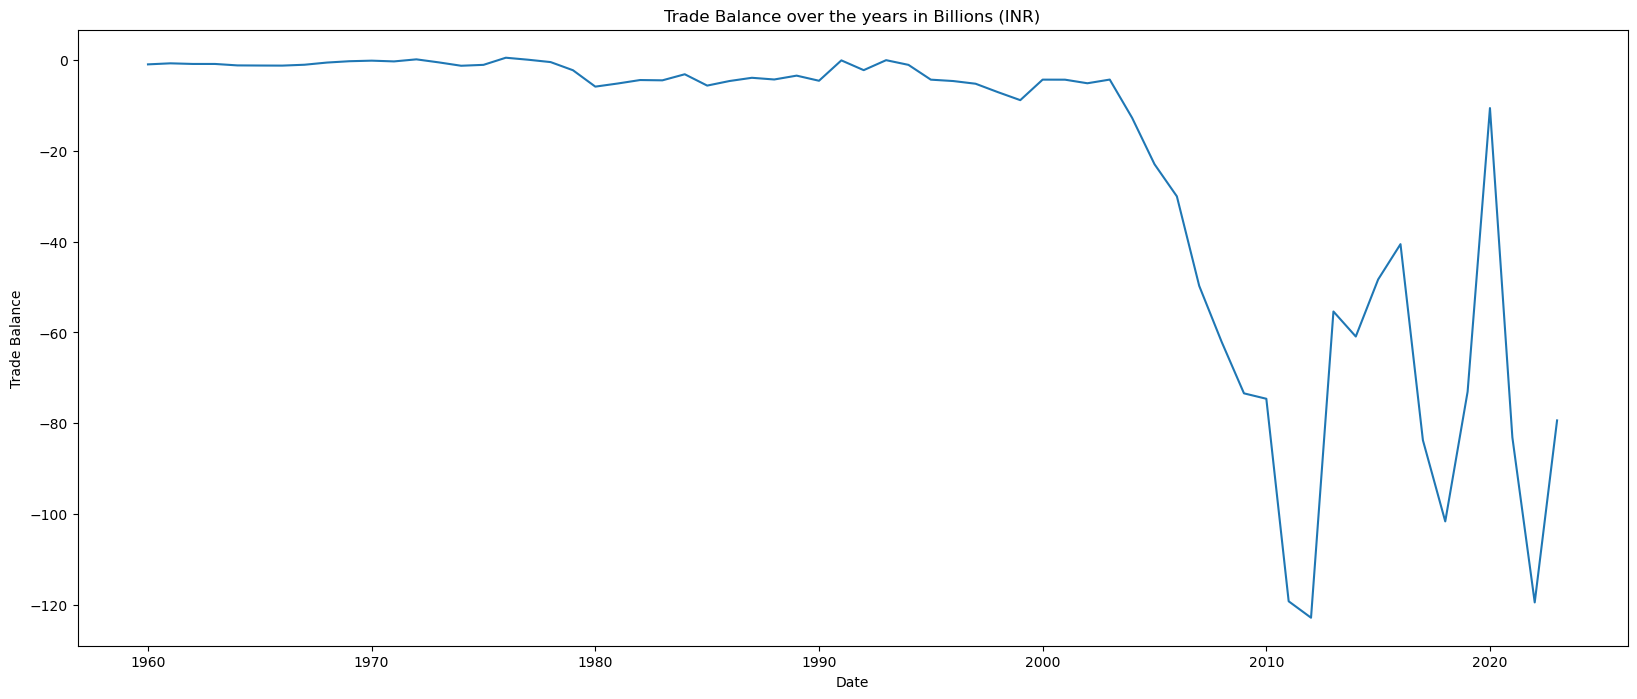

In [ ]:
plt.figure(figsize=(20,8))

sns.lineplot(x=trade_balance["Date"], y=trade_balance["Trade Balance"], errorbar=None)

plt.title("Trade Balance over the years in Billions (USD)")
plt.show()

In [897]:
trade_balance_inr = trade_balance.merge(df_2k, on="Date", how="inner")
trade_balance_inr

,Trade Balance,Date,Price,Open,High,Low,Vol.,Change %
0,-4.245773,2000-01-01,43.625,43.505,43.775,43.375,NaN,0.29%
1,-4.254861,2001-01-01,46.390,46.700,46.821,46.330,NaN,-0.62%
2,-5.045863,2002-01-01,48.510,48.300,48.655,48.050,NaN,0.60%
3,-4.233294,2003-01-01,47.800,48.052,48.085,47.750,NaN,-0.31%
4,-12.662377,2004-01-01,45.270,45.625,45.750,45.210,NaN,-0.78%
5,-22.898357,2005-01-01,43.645,43.425,44.135,43.335,NaN,0.91%
6,-29.981105,2006-01-01,43.925,45.115,45.155,43.925,NaN,-2.38%
7,-49.726427,2007-01-01,44.080,44.130,44.635,44.010,NaN,-0.08%
8,-62.024911,2008-01-01,39.280,39.410,39.790,39.030,NaN,-0.32%
9,-73.425843,2009-01-01,48.850,48.700,49.350,47.930,NaN,0.47%


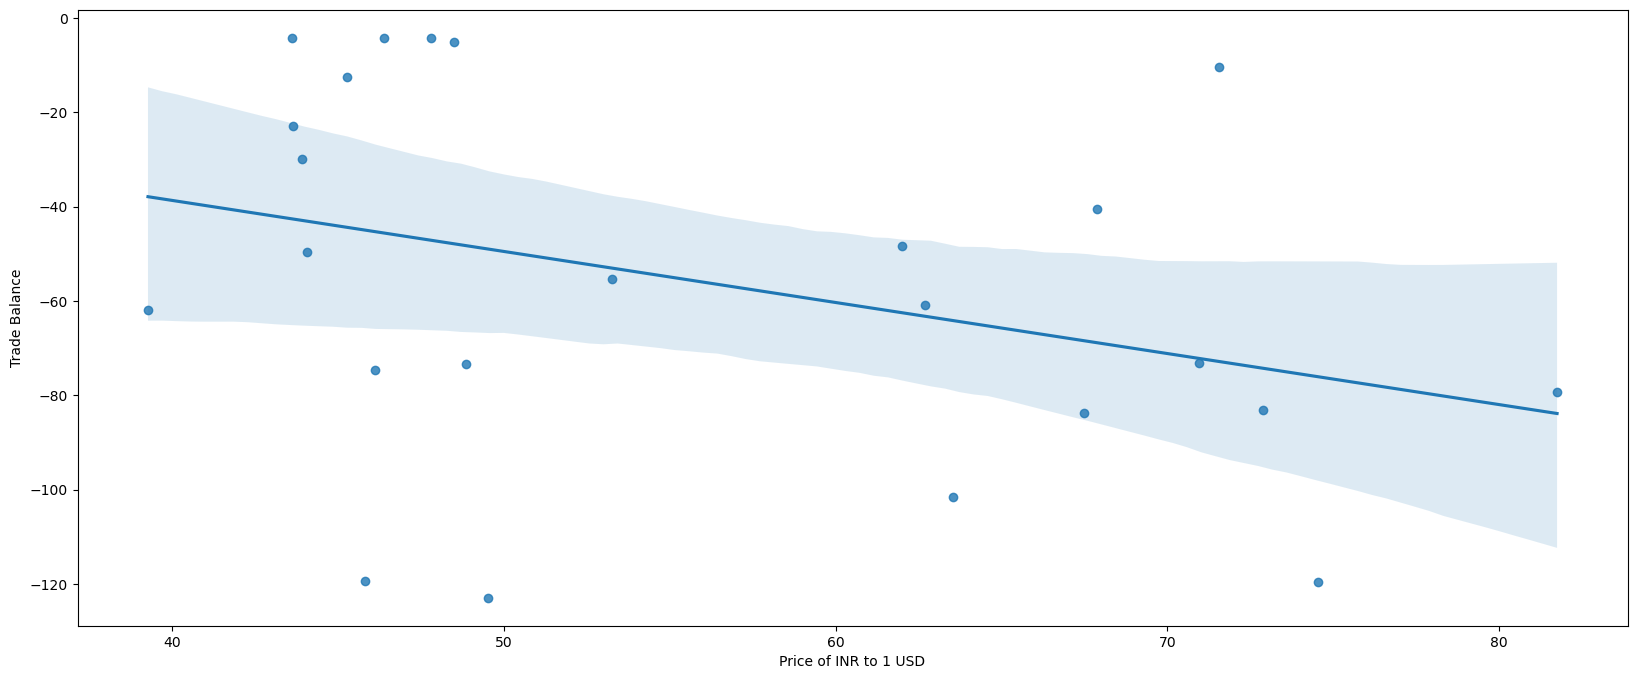

In [898]:
plt.figure(figsize=(20,8))

sns.regplot(y=trade_balance_inr["Trade Balance"], x=trade_balance_inr["Price"])

plt.xlabel("Price of INR to 1 USD")
plt.show()

In [934]:
corr, p = pearsonr(trade_balance_inr["Price"], trade_balance_inr["Trade Balance"])
print(f"Correlation between INR and Trade Balance over the last few year: {corr:.2f}, p-value: {p:.3f}")

Correlation between INR and Trade Balance over the last few year: -0.35, p-value: 0.090


In [899]:
balance = pd.read_csv("fii_dii_india.csv")
balance

,Date,FII_Gross_Purchase,FII_Gross_Sales,FII_Net_Purchase/Sales,DII_Gross_Purchase,DII_Gross_Sales,DII_Net_Purchase/Sales
0,2007-01-06,2481.99,2108.61,373.38,1122.01,802.17,319.84
1,2007-01-08,3620.82,4876.36,-1255.54,1898.60,963.16,935.44
2,2007-01-10,4311.66,2589.92,1721.74,1251.99,2181.76,-929.77
3,2007-01-11,5389.86,5315.61,74.25,1929.40,1873.18,56.22
4,2007-02-04,2010.80,2520.13,-509.33,0.00,0.00,0.00
...,...,...,...,...,...,...,...
3765,2022-12-01,6981.26,7982.83,-1001.57,7458.25,6126.24,1332.01
3766,2022-12-04,7047.27,10175.66,-3128.39,6629.33,5759.32,870.01
3767,2022-12-05,6018.03,11273.78,-5255.75,9487.39,4671.75,4815.64
3768,2022-12-07,4650.66,6216.34,-1565.68,3493.93,3353.22,140.71


In [900]:
balance["Date"] = pd.to_datetime(balance["Date"],  format="%Y-%m-%d")
balance

,Date,FII_Gross_Purchase,FII_Gross_Sales,FII_Net_Purchase/Sales,DII_Gross_Purchase,DII_Gross_Sales,DII_Net_Purchase/Sales
0,2007-01-06,2481.99,2108.61,373.38,1122.01,802.17,319.84
1,2007-01-08,3620.82,4876.36,-1255.54,1898.60,963.16,935.44
2,2007-01-10,4311.66,2589.92,1721.74,1251.99,2181.76,-929.77
3,2007-01-11,5389.86,5315.61,74.25,1929.40,1873.18,56.22
4,2007-02-04,2010.80,2520.13,-509.33,0.00,0.00,0.00
...,...,...,...,...,...,...,...
3765,2022-12-01,6981.26,7982.83,-1001.57,7458.25,6126.24,1332.01
3766,2022-12-04,7047.27,10175.66,-3128.39,6629.33,5759.32,870.01
3767,2022-12-05,6018.03,11273.78,-5255.75,9487.39,4671.75,4815.64
3768,2022-12-07,4650.66,6216.34,-1565.68,3493.93,3353.22,140.71


In [901]:
balance["Month/Year"] = balance["Date"].dt.to_period('M')
balance['Date'] = balance['Month/Year'].dt.to_timestamp()
balance = balance.drop(labels=["Month/Year"], axis=1)
balance

,Date,FII_Gross_Purchase,FII_Gross_Sales,FII_Net_Purchase/Sales,DII_Gross_Purchase,DII_Gross_Sales,DII_Net_Purchase/Sales
0,2007-01-01,2481.99,2108.61,373.38,1122.01,802.17,319.84
1,2007-01-01,3620.82,4876.36,-1255.54,1898.60,963.16,935.44
2,2007-01-01,4311.66,2589.92,1721.74,1251.99,2181.76,-929.77
3,2007-01-01,5389.86,5315.61,74.25,1929.40,1873.18,56.22
4,2007-02-01,2010.80,2520.13,-509.33,0.00,0.00,0.00
...,...,...,...,...,...,...,...
3765,2022-12-01,6981.26,7982.83,-1001.57,7458.25,6126.24,1332.01
3766,2022-12-01,7047.27,10175.66,-3128.39,6629.33,5759.32,870.01
3767,2022-12-01,6018.03,11273.78,-5255.75,9487.39,4671.75,4815.64
3768,2022-12-01,4650.66,6216.34,-1565.68,3493.93,3353.22,140.71


In [902]:
monthly_balance = balance.groupby('Date').sum().reset_index()
monthly_balance["DII_Net_Purchase/Sales"] = monthly_balance["DII_Gross_Purchase"] - monthly_balance["DII_Gross_Sales"]
monthly_balance["FII_Net_Purchase/Sales"] = monthly_balance["FII_Gross_Purchase"] - monthly_balance["FII_Gross_Sales"]
monthly_balance

,Date,FII_Gross_Purchase,FII_Gross_Sales,FII_Net_Purchase/Sales,DII_Gross_Purchase,DII_Gross_Sales,DII_Net_Purchase/Sales
0,2007-01-01,15804.33,14890.50,913.83,6202.00,5820.27,381.73
1,2007-02-01,8881.46,11065.05,-2183.59,3168.63,2528.03,640.60
2,2007-03-01,25286.42,21879.14,3407.28,5846.29,5560.28,286.01
3,2007-04-01,44969.16,41638.50,3330.66,14754.21,14703.79,50.42
4,2007-05-01,56735.48,55484.03,1251.45,23151.31,20716.13,2435.18
...,...,...,...,...,...,...,...
187,2022-08-01,152697.90,157343.33,-4645.43,108983.53,102422.09,6561.44
188,2022-09-01,27062.17,37647.96,-10585.79,31126.72,21355.29,9771.43
189,2022-10-01,47074.19,57784.81,-10710.62,42420.31,33244.80,9175.51
190,2022-11-01,50000.17,54670.61,-4670.44,42704.73,38667.89,4036.84


In [903]:
fii_dii_inr = df_2k.merge(monthly_balance, how="inner", on="Date")
fii_dii_inr

,Date,Price,Open,High,Low,Vol.,Change %,FII_Gross_Purchase,FII_Gross_Sales,FII_Net_Purchase/Sales,DII_Gross_Purchase,DII_Gross_Sales,DII_Net_Purchase/Sales
0,2022-12-01,82.717,81.151,82.993,80.985,NaN,1.67%,32957.35,40868.28,-7910.93,32821.32,26502.40,6318.92
1,2022-11-01,81.359,82.817,82.996,80.483,NaN,-1.70%,50000.17,54670.61,-4670.44,42704.73,38667.89,4036.84
2,2022-10-01,82.770,81.532,83.268,81.284,NaN,1.55%,47074.19,57784.81,-10710.62,42420.31,33244.80,9175.51
3,2022-09-01,81.509,79.535,82.020,79.010,NaN,2.54%,27062.17,37647.96,-10585.79,31126.72,21355.29,9771.43
4,2022-08-01,79.491,79.185,80.135,78.393,NaN,0.20%,152697.90,157343.33,-4645.43,108983.53,102422.09,6561.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2007-05-01,40.375,41.165,41.485,40.155,NaN,-1.63%,56735.48,55484.03,1251.45,23151.31,20716.13,2435.18
188,2007-04-01,41.045,43.155,43.335,40.555,NaN,-4.81%,44969.16,41638.50,3330.66,14754.21,14703.79,50.42
189,2007-03-01,43.120,44.070,44.715,42.770,NaN,-2.20%,25286.42,21879.14,3407.28,5846.29,5560.28,286.01
190,2007-02-01,44.090,44.080,44.380,43.850,NaN,0.02%,8881.46,11065.05,-2183.59,3168.63,2528.03,640.60


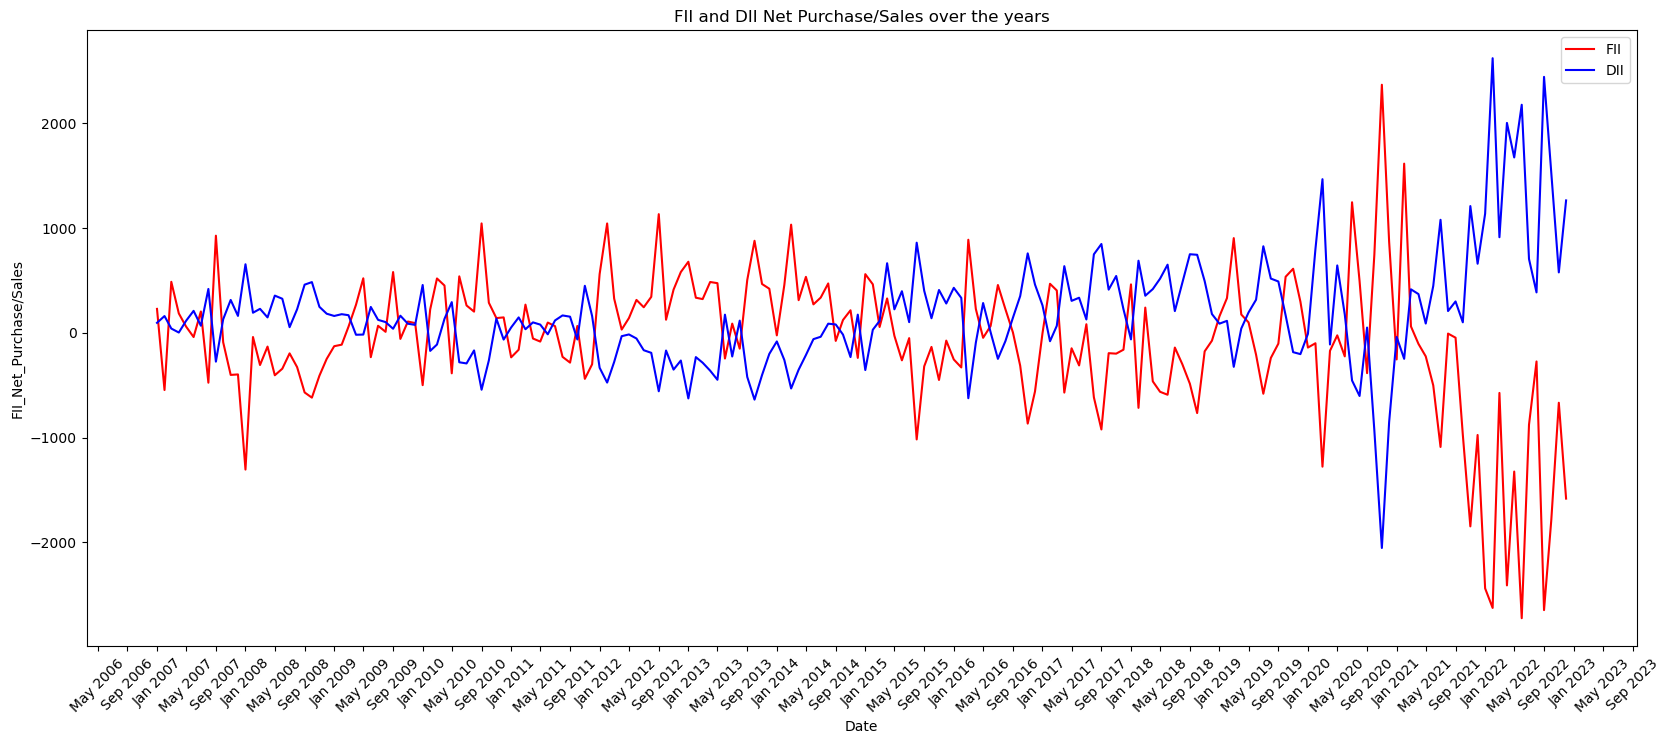

In [904]:
plt.figure(figsize=(20,8))

sns.lineplot(x=balance["Date"], y=balance["FII_Net_Purchase/Sales"], label="FII", color="r", errorbar=None)
sns.lineplot(x=balance["Date"], y=balance["DII_Net_Purchase/Sales"], label="DII", color="b", errorbar=None)

ax = plt.gca() 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)
plt.title("FII and DII Net Purchase/Sales over the years")
plt.show()

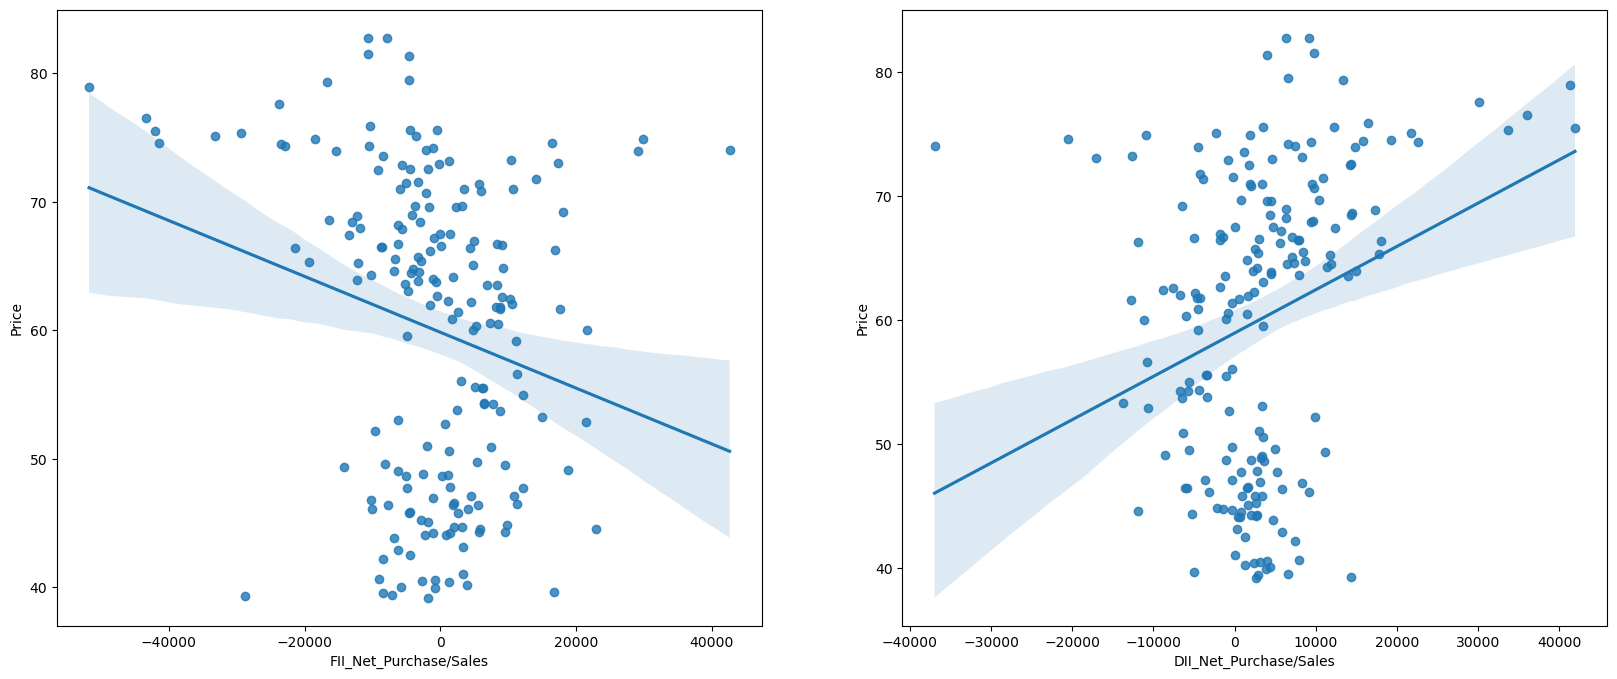

In [905]:
fig, axes = plt.subplots(1, 2, figsize=(20,8), squeeze=False)

sns.regplot(x=fii_dii_inr["FII_Net_Purchase/Sales"], y=fii_dii_inr["Price"], ax=axes[0,0])
sns.regplot(x=fii_dii_inr["DII_Net_Purchase/Sales"], y=fii_dii_inr["Price"], ax=axes[0,1])

plt.show()

In [935]:
corr, p = pearsonr(fii_dii_inr["FII_Net_Purchase/Sales"], fii_dii_inr["Price"])
print(f"Correlation between INR and FII Net Purchase/Sales: {corr:.2f}, p-value: {p:.3f}")

corr, p = pearsonr(fii_dii_inr["DII_Net_Purchase/Sales"], fii_dii_inr["Price"])
print(f"Correlation between INR and DII Net Purchase/Sales: {corr:.2f}, p-value: {p:.3f}")

Correlation between INR and FII Net Purchase/Sales: -0.22, p-value: 0.002
Correlation between INR and DII Net Purchase/Sales: 0.28, p-value: 0.000


EER Rates vs INR Pricing

In [906]:
eer = pd.read_csv("eer_rates.csv")
eer

,Date,IND_NEER,IND_REER,USA_NEER,USA_REER
0,1994-01-31,198.26,92.53,71.18,88.69
1,1994-02-28,198.27,92.27,71.26,88.20
2,1994-03-31,197.69,92.37,71.76,88.30
3,1994-04-30,198.85,93.78,72.39,88.21
4,1994-05-31,197.78,93.35,72.36,87.45
...,...,...,...,...,...
372,2025-01-31,94.97,101.74,110.78,115.09
373,2025-02-28,93.44,99.24,109.90,114.21
374,2025-03-31,92.95,98.31,108.57,112.90
375,2025-04-30,93.04,98.51,106.98,111.39


In [907]:
eer["Date"] = pd.to_datetime(eer["Date"], format="%Y-%m-%d")
eer["Date"] = eer["Date"] + pd.Timedelta(days=1)
eer

,Date,IND_NEER,IND_REER,USA_NEER,USA_REER
0,1994-02-01,198.26,92.53,71.18,88.69
1,1994-03-01,198.27,92.27,71.26,88.20
2,1994-04-01,197.69,92.37,71.76,88.30
3,1994-05-01,198.85,93.78,72.39,88.21
4,1994-06-01,197.78,93.35,72.36,87.45
...,...,...,...,...,...
372,2025-02-01,94.97,101.74,110.78,115.09
373,2025-03-01,93.44,99.24,109.90,114.21
374,2025-04-01,92.95,98.31,108.57,112.90
375,2025-05-01,93.04,98.51,106.98,111.39


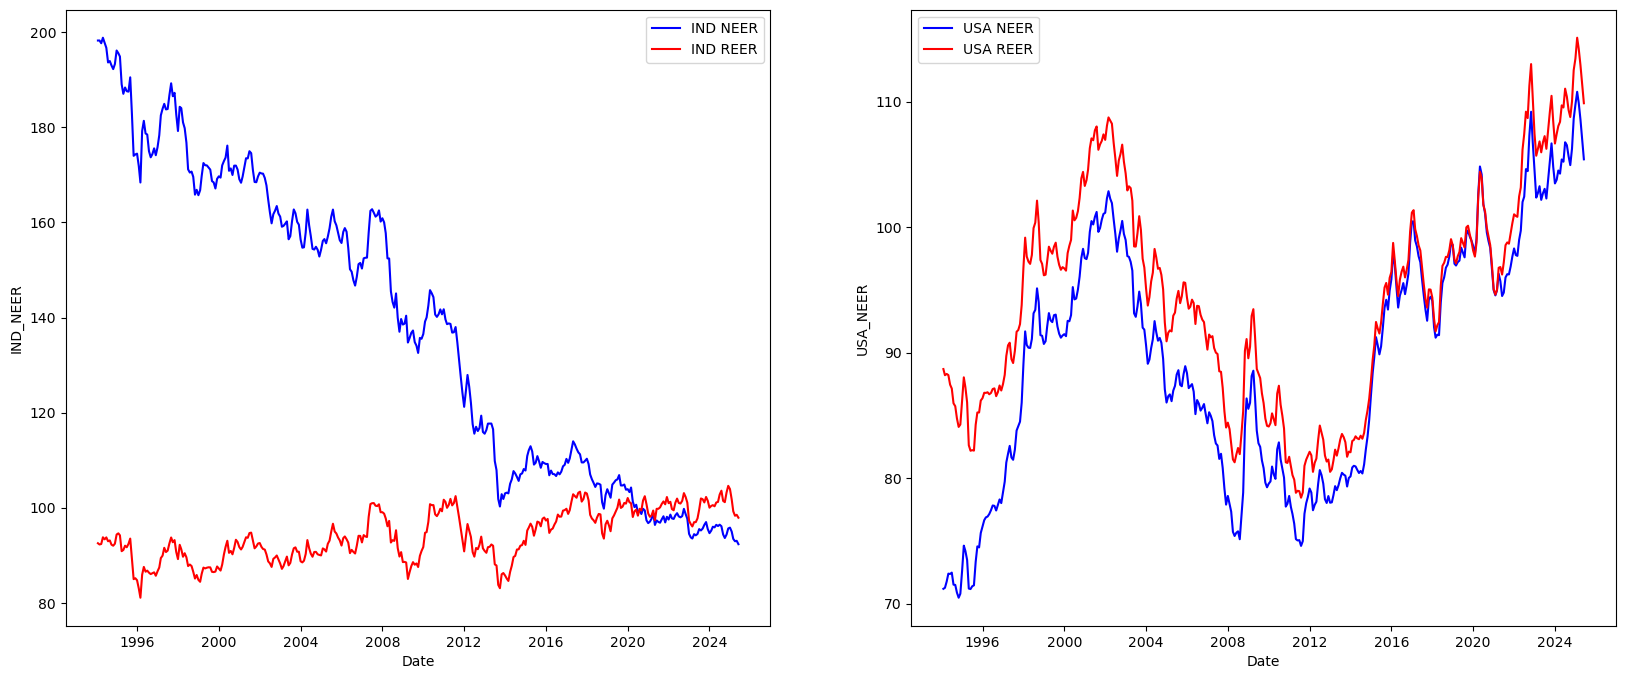

In [908]:
fig, axes = plt.subplots(1, 2, figsize=(20,8), squeeze=False)

sns.lineplot(x=eer["Date"], y=eer["IND_NEER"], color="b", label="IND NEER", ax=axes[0,0])
sns.lineplot(x=eer["Date"], y=eer["IND_REER"], color="r", label="IND REER", ax=axes[0,0])
sns.lineplot(x=eer["Date"], y=eer["USA_NEER"], color="b", label="USA NEER", ax=axes[0,1])
sns.lineplot(x=eer["Date"], y=eer["USA_REER"], color="r", label="USA REER", ax=axes[0,1])

plt.show()

In [909]:
inr_usd_eer = eer.merge(df_2k, how="inner", on="Date")
inr_usd_eer = inr_usd_eer.merge(index_monthly, how="inner", on="Date")
inr_usd_eer

,Date,IND_NEER,IND_REER,USA_NEER,USA_REER,Price_x,Open_x,High_x,Low_x,Vol._x,Change %_x,Price_y,Open_y,High_y,Low_y,Vol._y,Change %_y
0,2000-01-01,169.70,87.22,91.47,96.71,43.625,43.505,43.775,43.375,NaN,0.29%,105.13,101.67,105.28,99.71,NaN,3.20%
1,2000-02-01,169.43,86.78,91.31,96.53,43.614,43.623,43.704,43.504,NaN,-0.03%,105.92,104.98,106.86,102.92,NaN,0.75%
2,2000-03-01,172.00,88.04,92.53,97.93,43.600,43.660,43.672,43.500,NaN,-0.03%,105.44,106.22,106.61,104.48,NaN,-0.45%
3,2000-04-01,172.90,90.18,92.50,98.52,43.650,43.650,43.715,43.590,NaN,0.11%,110.14,105.61,110.32,104.23,NaN,4.46%
4,2000-05-01,173.65,91.77,92.99,98.98,44.575,43.727,44.815,43.625,NaN,2.12%,108.74,109.90,112.86,108.18,NaN,-1.27%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2025-02-01,94.97,101.74,110.78,115.09,87.471,86.916,87.997,86.327,NaN,1.05%,107.61,108.50,109.88,106.13,0.01K,-0.70%
302,2025-03-01,93.44,99.24,109.90,114.21,85.460,87.449,87.449,85.398,NaN,-2.30%,104.21,107.56,107.56,103.20,0.02K,-3.16%
303,2025-04-01,92.95,98.31,108.57,112.90,84.599,85.459,86.751,84.466,NaN,-1.01%,99.47,104.18,104.37,97.92,0.00K,-4.55%
304,2025-05-01,93.04,98.51,106.98,111.39,85.525,84.609,86.115,83.765,NaN,1.09%,99.33,99.65,101.98,98.69,0.02K,-0.14%


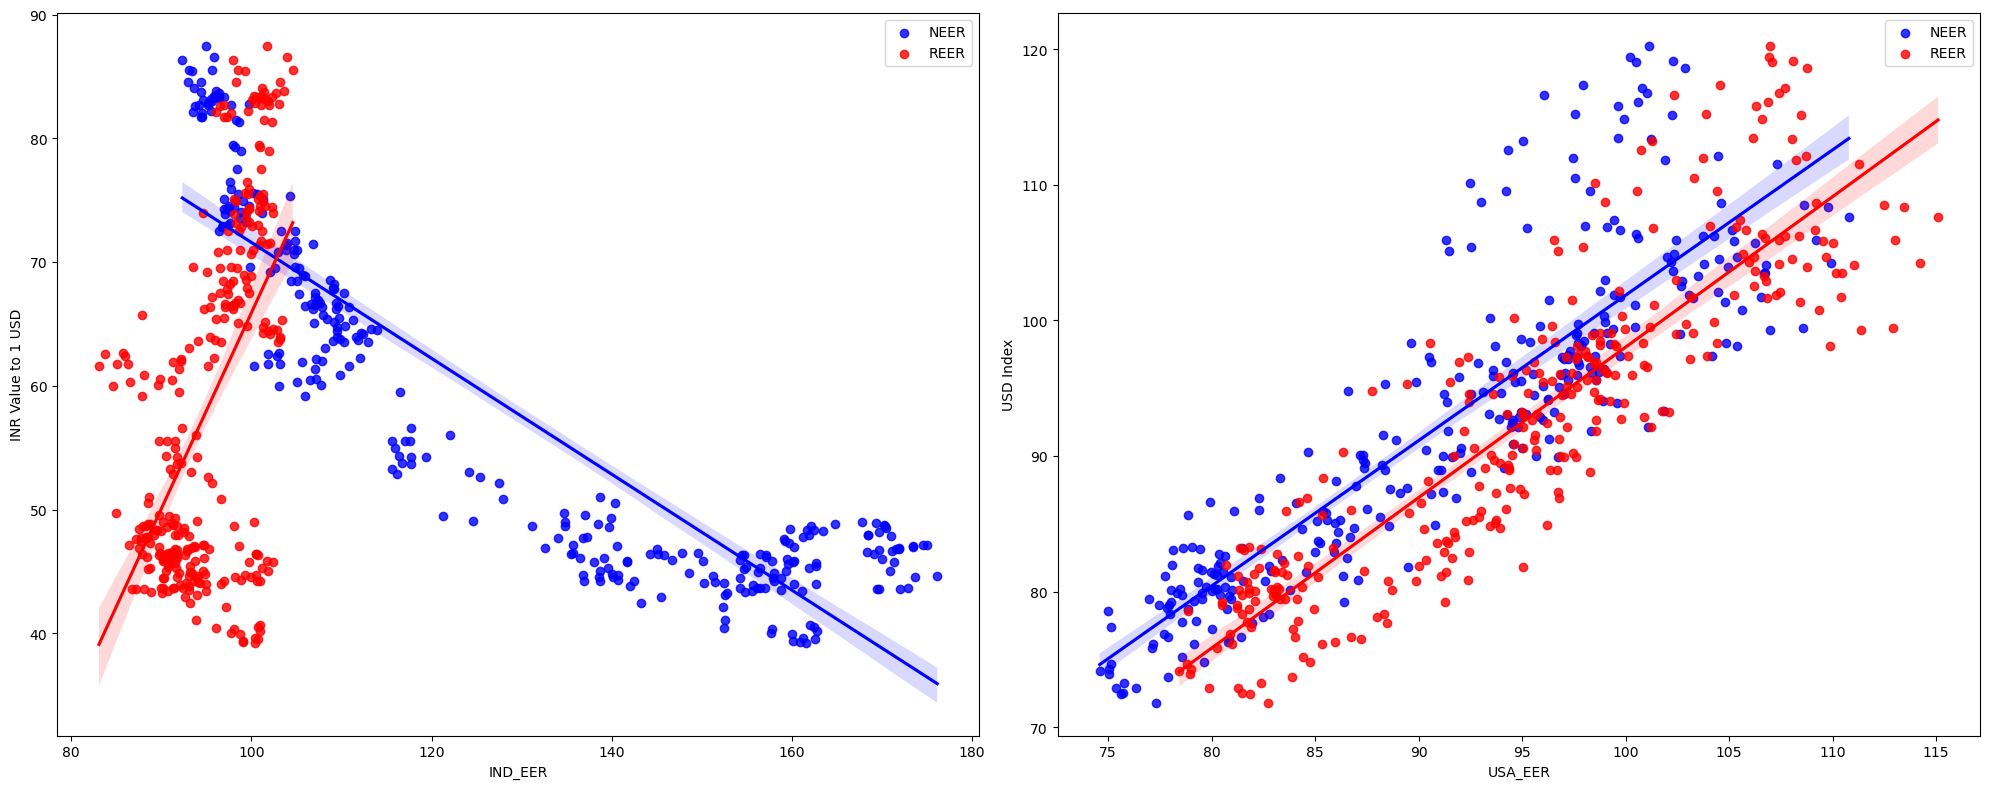

In [910]:
fig, axes = plt.subplots(1, 2, figsize=(20,8), squeeze=False)

sns.regplot(x=inr_usd_eer["IND_NEER"], y=inr_usd_eer["Price_x"], color="b", label="NEER", ax=axes[0,0])
sns.regplot(x=inr_usd_eer["IND_REER"], y=inr_usd_eer["Price_x"], color="r", label="REER", ax=axes[0,0])
sns.regplot(x=inr_usd_eer["USA_NEER"], y=inr_usd_eer["Price_y"], color="b", label="NEER", ax=axes[0,1])
sns.regplot(x=inr_usd_eer["USA_REER"], y=inr_usd_eer["Price_y"], color="r", label="REER", ax=axes[0,1])

axes[0,0].set_xlabel("IND_EER")
axes[0,0].set_ylabel("INR Value to 1 USD")
axes[0,1].set_xlabel("USA_EER")
axes[0,1].set_ylabel("USD Index")

axes[0,0].legend()
axes[0,1].legend()

plt.tight_layout()
plt.show()

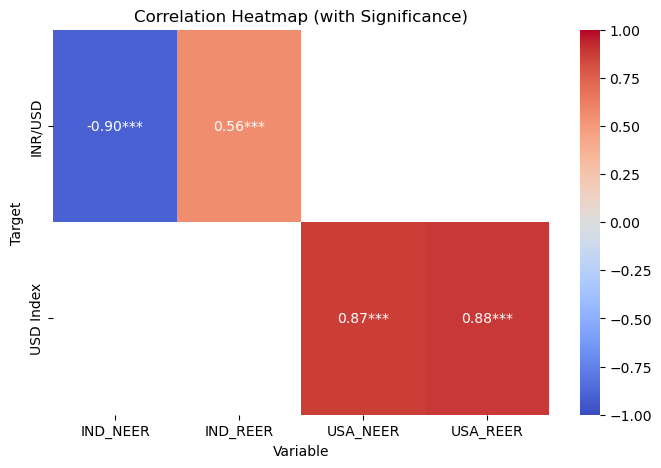

In [938]:
results = []

for var, target, price_col in [
    ("IND_NEER", "INR/USD", "Price_x"),
    ("IND_REER", "INR/USD", "Price_x"),
    ("USA_NEER", "USD Index", "Price_y"),
    ("USA_REER", "USD Index", "Price_y")
]:
    corr, p = pearsonr(inr_usd_eer[var], inr_usd_eer[price_col])
    
    if p < 0.001:
        stars = '***'
    elif p < 0.01:
        stars = '**'
    elif p < 0.05:
        stars = '*'
    else:
        stars = ''
    
    results.append({
        'Variable': var,
        'Target': target,
        'Correlation': corr,
        'Annotation': f"{corr:.2f}{stars}"
    })

corr_df = pd.DataFrame(results)

heatmap_data = corr_df.pivot(index='Target', columns='Variable', values='Correlation')
annot_data = corr_df.pivot(index='Target', columns='Variable', values='Annotation')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=annot_data, fmt='', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (with Significance)")
plt.show()

Credit-to-GDP Ratios

In [911]:
cgdp = pd.read_csv("credit_to_gdp_ratios.csv")
cgdp

,Date,IND_Credit_to_GDP_Ratios,USA_Credit_to_GDP_Ratios
0,1951-06-30,23.6,54.1
1,1951-09-30,22.0,53.9
2,1951-12-31,21.6,54.0
3,1952-03-31,21.7,53.6
4,1952-06-30,21.9,54.8
...,...,...,...
290,2023-12-31,91.3,147.6
291,2024-03-31,91.6,146.7
292,2024-06-30,92.1,145.8
293,2024-09-30,91.7,145.2


In [912]:
cgdp["Date"] = pd.to_datetime(cgdp["Date"], format="%Y-%m-%d")
cgdp["Date"] = cgdp["Date"] + pd.Timedelta(days=1)
cgdp

,Date,IND_Credit_to_GDP_Ratios,USA_Credit_to_GDP_Ratios
0,1951-07-01,23.6,54.1
1,1951-10-01,22.0,53.9
2,1952-01-01,21.6,54.0
3,1952-04-01,21.7,53.6
4,1952-07-01,21.9,54.8
...,...,...,...
290,2024-01-01,91.3,147.6
291,2024-04-01,91.6,146.7
292,2024-07-01,92.1,145.8
293,2024-10-01,91.7,145.2


In [913]:
cgdp_inr_usd = cgdp.merge(df_2k, on="Date", how="inner")
cgdp_inr_usd =  cgdp_inr_usd.merge(index_monthly, on="Date", how="inner")
cgdp_inr_usd

,Date,IND_Credit_to_GDP_Ratios,USA_Credit_to_GDP_Ratios,Price_x,Open_x,High_x,Low_x,Vol._x,Change %_x,Price_y,Open_y,High_y,Low_y,Vol._y,Change %_y
0,2000-01-01,54.9,133.9,43.625,43.505,43.775,43.375,NaN,0.29%,105.13,101.67,105.28,99.71,NaN,3.20%
1,2000-04-01,55.7,134.8,43.650,43.650,43.715,43.590,NaN,0.11%,110.14,105.61,110.32,104.23,NaN,4.46%
2,2000-07-01,56.9,135.7,45.050,44.740,45.170,44.355,NaN,0.90%,109.57,106.82,109.92,106.70,NaN,2.56%
3,2000-10-01,56.7,136.2,46.845,46.105,46.965,45.955,NaN,1.88%,116.65,113.14,119.07,112.95,NaN,3.00%
4,2001-01-01,58.6,136.7,46.390,46.700,46.821,46.330,NaN,-0.62%,110.52,109.33,112.65,108.09,NaN,0.88%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2024-01-01,91.3,147.6,83.095,83.240,83.359,82.767,NaN,-0.11%,103.27,101.42,103.82,101.34,NaN,1.92%
97,2024-04-01,91.6,146.7,83.450,83.343,83.747,83.147,NaN,0.12%,106.22,104.49,106.52,103.88,NaN,1.60%
98,2024-07-01,92.1,145.8,83.699,83.380,83.810,83.349,NaN,0.41%,104.10,105.85,106.05,103.65,NaN,-1.67%
99,2024-10-01,91.7,145.2,84.061,83.851,84.142,83.786,NaN,0.37%,103.98,100.74,104.64,100.70,NaN,3.17%


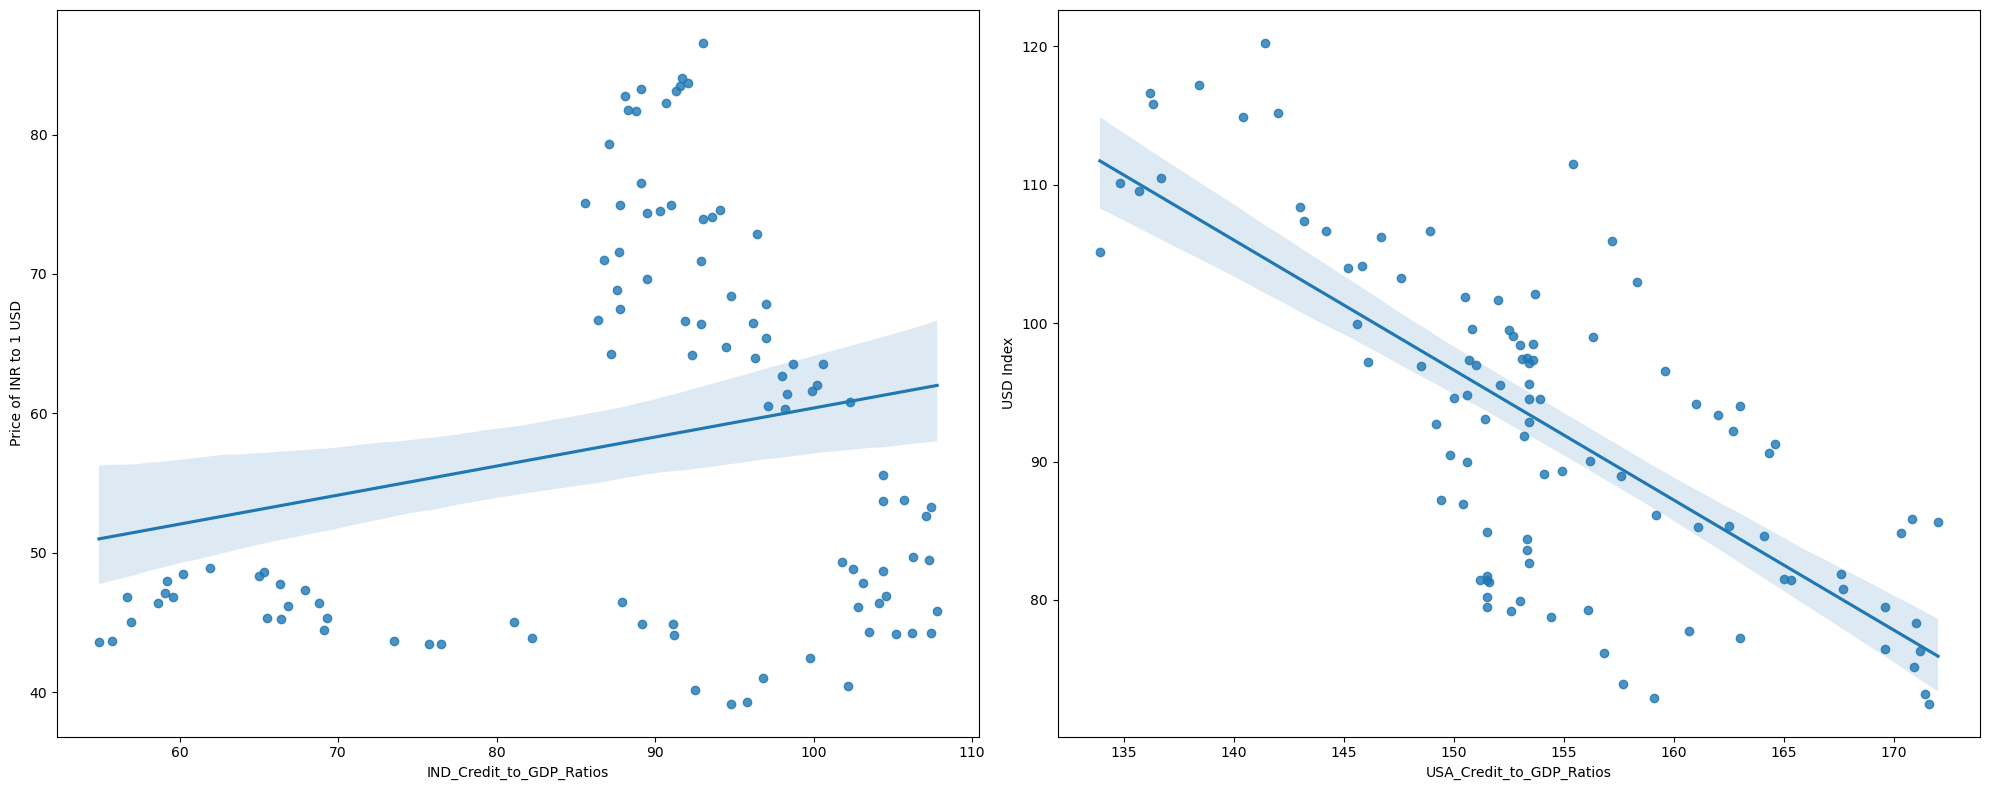

In [914]:
fig, axes = plt.subplots(1, 2, figsize=(20,8), squeeze=False)

sns.regplot(x=cgdp_inr_usd["IND_Credit_to_GDP_Ratios"], y=cgdp_inr_usd["Price_x"], ax=axes[0,0])
sns.regplot(x=cgdp_inr_usd["USA_Credit_to_GDP_Ratios"], y=cgdp_inr_usd["Price_y"], ax=axes[0,1])

axes[0,0].set_ylabel("Price of INR to 1 USD")
axes[0,1].set_ylabel("USD Index")
plt.tight_layout()
plt.show()

In [939]:
corr, p = pearsonr(cgdp_inr_usd["IND_Credit_to_GDP_Ratios"], cgdp_inr_usd["Price_x"])
print(f"Correlation between INR and IND Credit to GDP: {corr:.2f}, p-value: {p:.3f}")

corr, p = pearsonr(cgdp_inr_usd["USA_Credit_to_GDP_Ratios"], cgdp_inr_usd["Price_y"])
print(f"Correlation between USD Index and USA Credit to GDP: {corr:.2f}, p-value: {p:.3f}")

Correlation between INR and IND Credit to GDP: 0.22, p-value: 0.026
Correlation between USD Index and USA Credit to GDP: -0.73, p-value: 0.000


Real Interest Rates

In [915]:
rir = pd.read_csv("Real_Interest_Rates_IND.csv")
rir

,Year,Real interest rate (%)
0,1978,10.774631
1,1979,-1.061146
2,1980,4.476508
3,1981,5.118237
4,1982,7.774707
5,1983,7.320987
6,1984,7.947100
7,1985,8.681674
8,1986,9.093224
9,1987,6.560180


In [916]:
rir["Date"] = pd.to_datetime(rir["Year"], format="%Y")
rir = rir.drop(labels="Year", axis=1)
rir

,Real interest rate (%),Date
0,10.774631,1978-01-01
1,-1.061146,1979-01-01
2,4.476508,1980-01-01
3,5.118237,1981-01-01
4,7.774707,1982-01-01
5,7.320987,1983-01-01
6,7.947100,1984-01-01
7,8.681674,1985-01-01
8,9.093224,1986-01-01
9,6.560180,1987-01-01


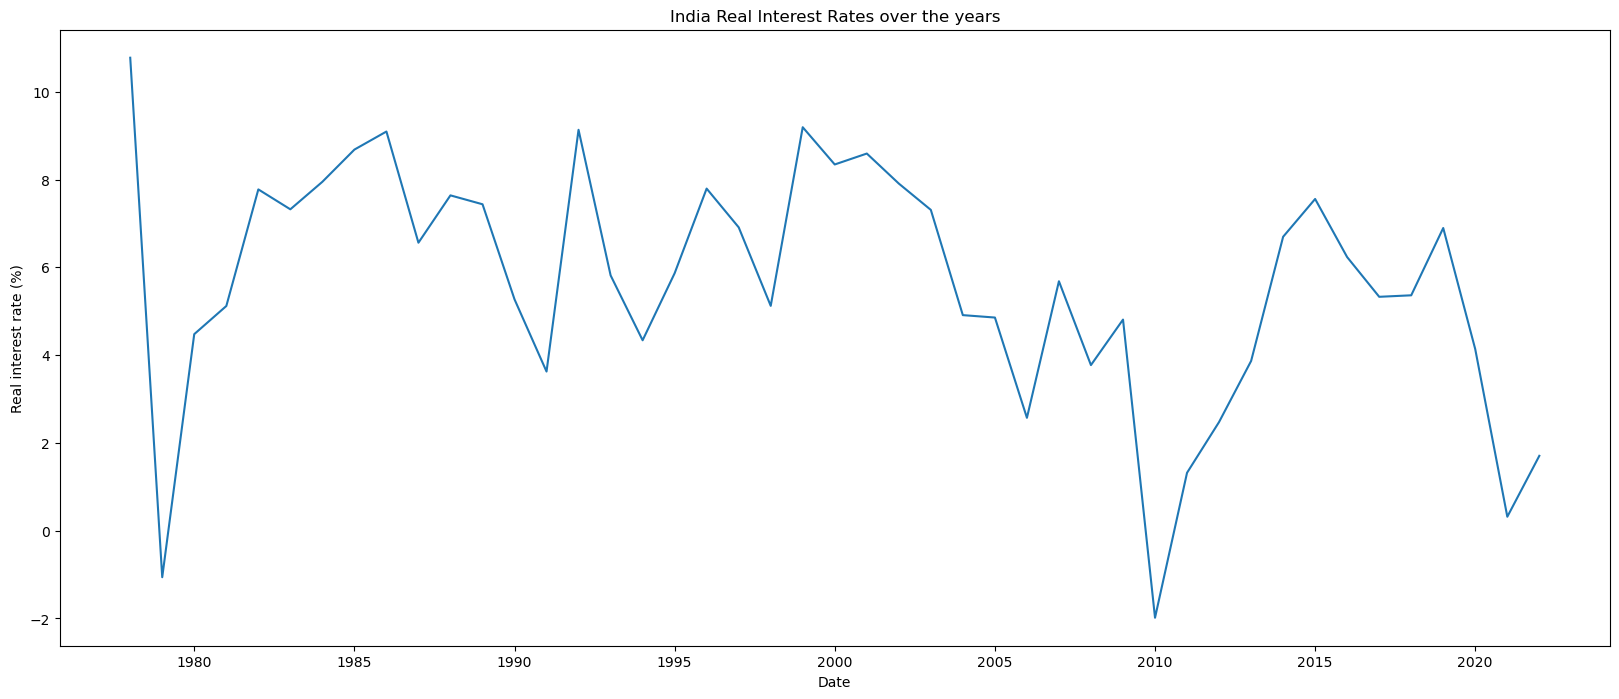

In [917]:
plt.figure(figsize=(20,8))

sns.lineplot(x=rir["Date"], y=rir["Real interest rate (%)"], errorbar=None)

plt.title("India Real Interest Rates over the years")
plt.show()

In [918]:
rir_inr = rir.merge(df_2k, on="Date", how="inner")
rir_inr

,Real interest rate (%),Date,Price,Open,High,Low,Vol.,Change %
0,8.342611,2000-01-01,43.625,43.505,43.775,43.375,NaN,0.29%
1,8.591449,2001-01-01,46.390,46.700,46.821,46.330,NaN,-0.62%
2,7.907177,2002-01-01,48.510,48.300,48.655,48.050,NaN,0.60%
3,7.307881,2003-01-01,47.800,48.052,48.085,47.750,NaN,-0.31%
4,4.910128,2004-01-01,45.270,45.625,45.750,45.210,NaN,-0.78%
5,4.855145,2005-01-01,43.645,43.425,44.135,43.335,NaN,0.91%
6,2.570607,2006-01-01,43.925,45.115,45.155,43.925,NaN,-2.38%
7,5.681844,2007-01-01,44.080,44.130,44.635,44.010,NaN,-0.08%
8,3.771756,2008-01-01,39.280,39.410,39.790,39.030,NaN,-0.32%
9,4.808592,2009-01-01,48.850,48.700,49.350,47.930,NaN,0.47%


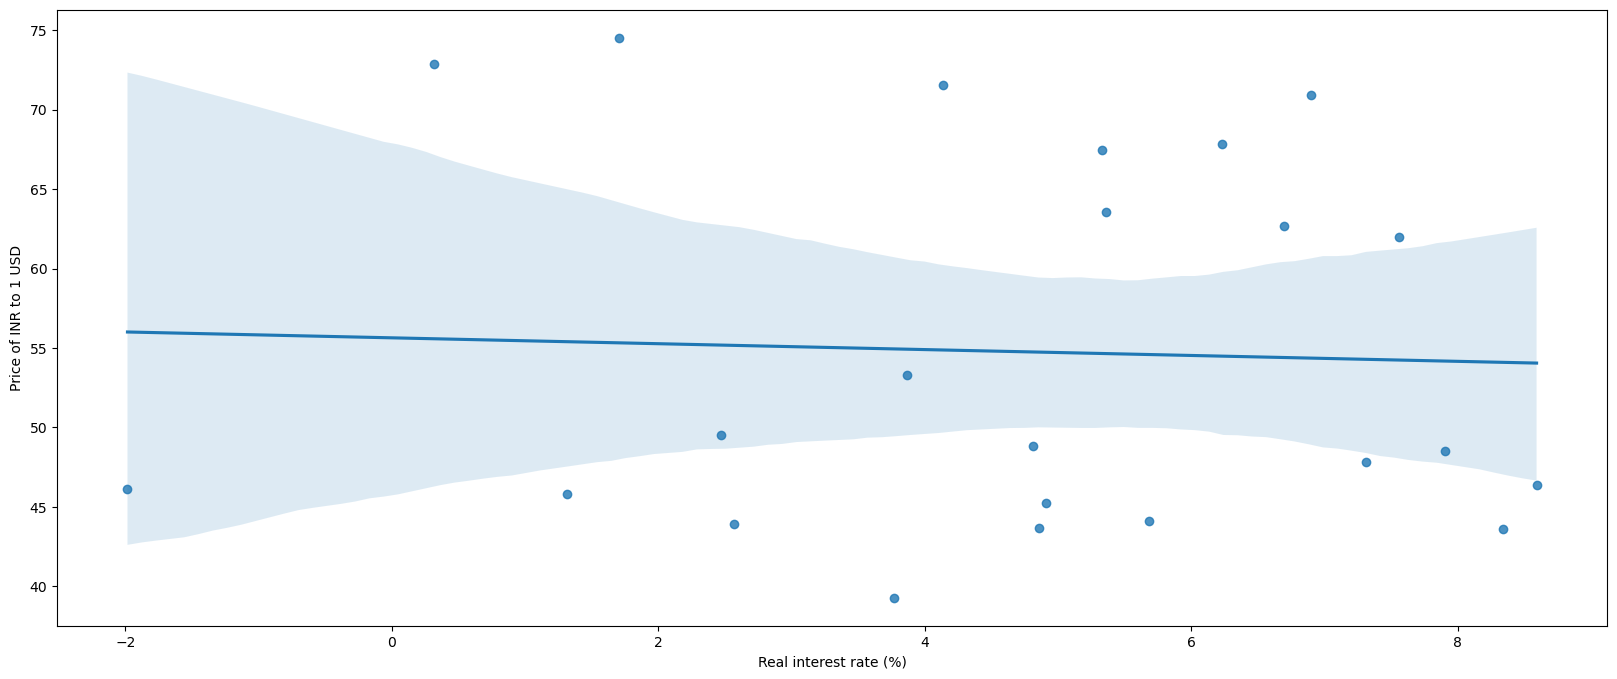

In [919]:
plt.figure(figsize=(20,8))

sns.regplot(x=rir_inr["Real interest rate (%)"], y=rir_inr["Price"])

plt.ylabel("Price of INR to 1 USD")
plt.show()

In [940]:
corr, p = pearsonr(rir_inr["Real interest rate (%)"], y=rir_inr["Price"])
print(f"Correlation between Real interest Rate(%) and INR: {corr:.2f}, p-value: {p:.3f}")

Correlation between Real interest Rate(%) and INR: -0.04, p-value: 0.845


Lag Analysis for FII Flows

In [920]:
fii_dii_inr

,Date,Price,Open,High,Low,Vol.,Change %,FII_Gross_Purchase,FII_Gross_Sales,FII_Net_Purchase/Sales,DII_Gross_Purchase,DII_Gross_Sales,DII_Net_Purchase/Sales
0,2022-12-01,82.717,81.151,82.993,80.985,NaN,1.67%,32957.35,40868.28,-7910.93,32821.32,26502.40,6318.92
1,2022-11-01,81.359,82.817,82.996,80.483,NaN,-1.70%,50000.17,54670.61,-4670.44,42704.73,38667.89,4036.84
2,2022-10-01,82.770,81.532,83.268,81.284,NaN,1.55%,47074.19,57784.81,-10710.62,42420.31,33244.80,9175.51
3,2022-09-01,81.509,79.535,82.020,79.010,NaN,2.54%,27062.17,37647.96,-10585.79,31126.72,21355.29,9771.43
4,2022-08-01,79.491,79.185,80.135,78.393,NaN,0.20%,152697.90,157343.33,-4645.43,108983.53,102422.09,6561.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2007-05-01,40.375,41.165,41.485,40.155,NaN,-1.63%,56735.48,55484.03,1251.45,23151.31,20716.13,2435.18
188,2007-04-01,41.045,43.155,43.335,40.555,NaN,-4.81%,44969.16,41638.50,3330.66,14754.21,14703.79,50.42
189,2007-03-01,43.120,44.070,44.715,42.770,NaN,-2.20%,25286.42,21879.14,3407.28,5846.29,5560.28,286.01
190,2007-02-01,44.090,44.080,44.380,43.850,NaN,0.02%,8881.46,11065.05,-2183.59,3168.63,2528.03,640.60


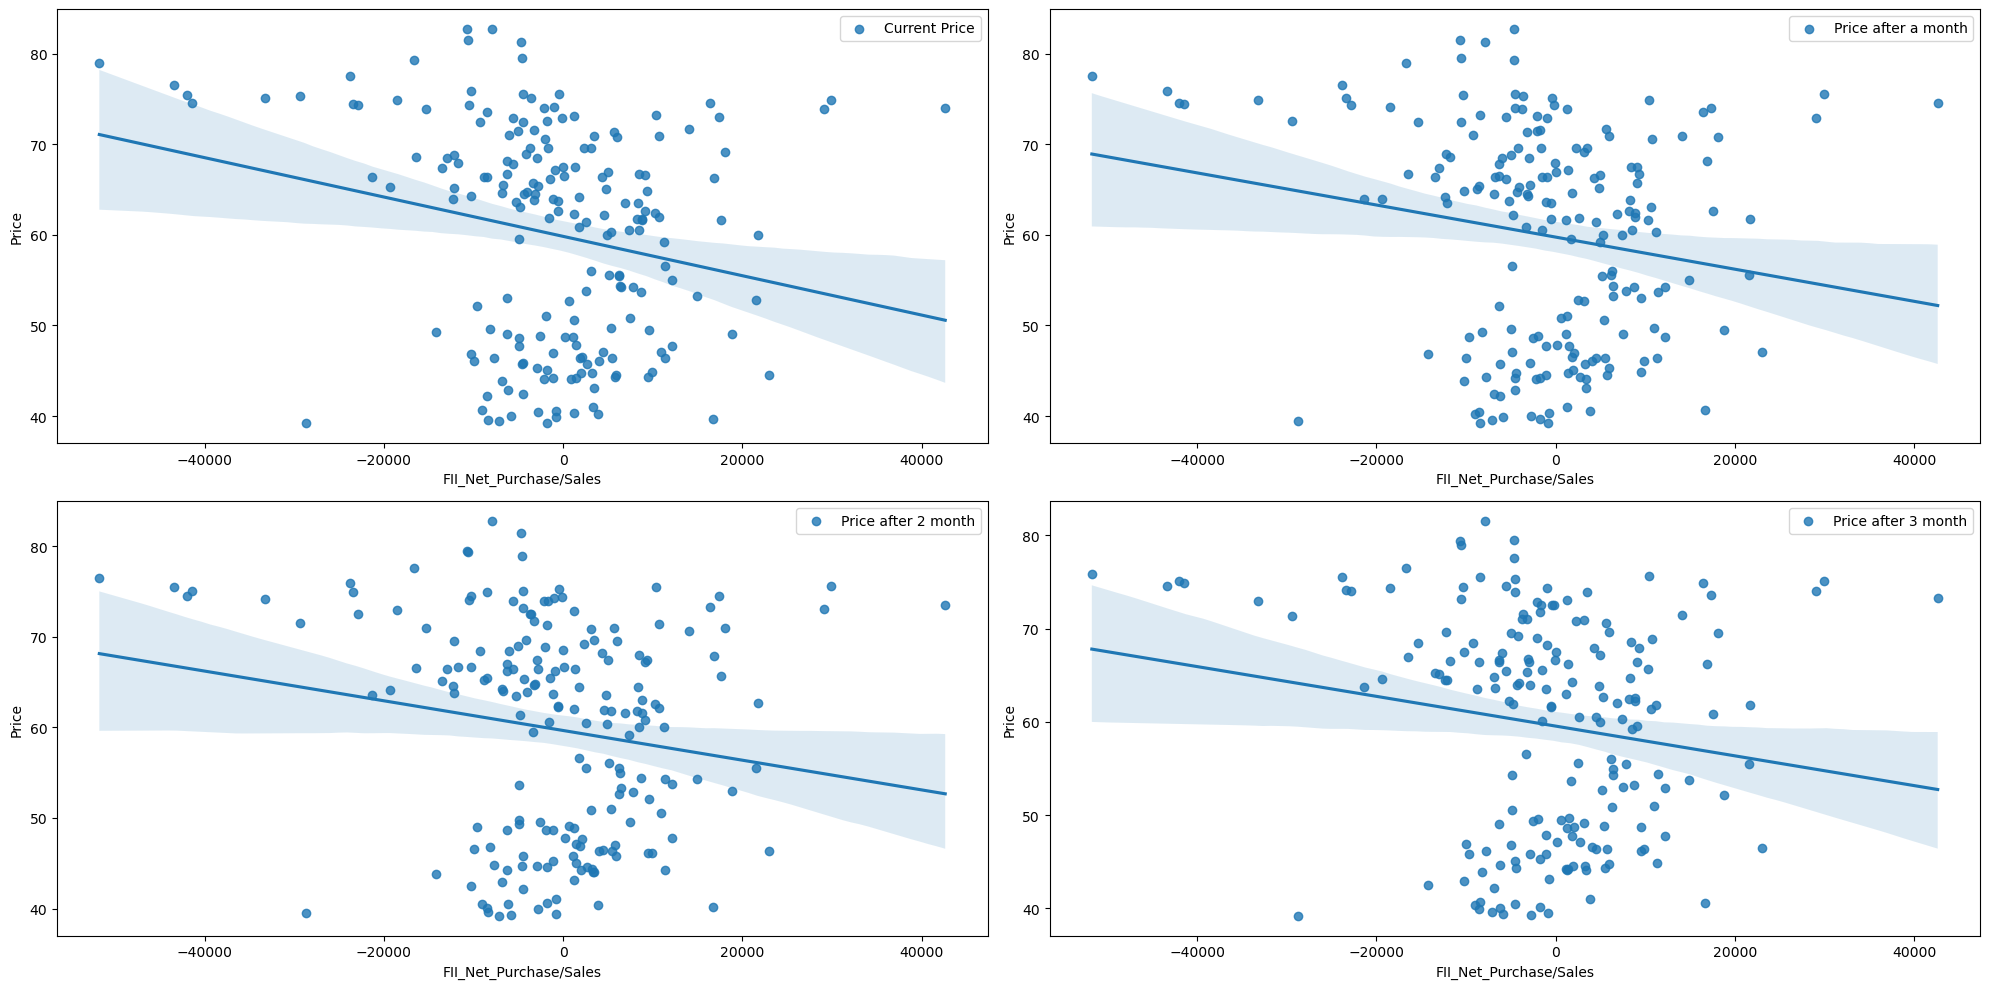

In [921]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), squeeze=False)

sns.regplot(x=fii_dii_inr["FII_Net_Purchase/Sales"], y=fii_dii_inr["Price"], ax=axes[0,0], label="Current Price")
sns.regplot(x=fii_dii_inr["FII_Net_Purchase/Sales"].shift(1), y=fii_dii_inr["Price"], ax=axes[0,1], label="Price after a month")
sns.regplot(x=fii_dii_inr["FII_Net_Purchase/Sales"].shift(2), y=fii_dii_inr["Price"], ax=axes[1,0], label="Price after 2 month")
sns.regplot(x=fii_dii_inr["FII_Net_Purchase/Sales"].shift(3), y=fii_dii_inr["Price"], ax=axes[1,1], label="Price after 3 month")

axes[0,0].legend()
axes[0,1].legend()
axes[1,0].legend()
axes[1,1].legend()

plt.tight_layout()
plt.show()

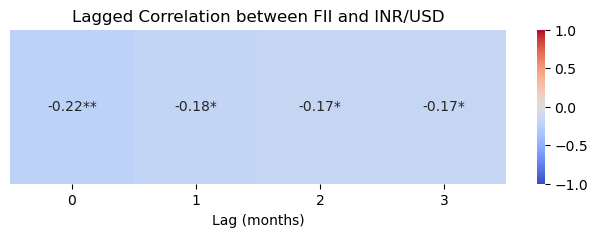

In [943]:
lags = [0, 1, 2, 3]
results = []

for lag in lags:
    shifted_fii = fii_dii_inr["FII_Net_Purchase/Sales"].shift(lag)

    valid_data = fii_dii_inr[['Price']].copy()
    valid_data['FII_shifted'] = shifted_fii
    valid_data = valid_data.dropna()

    corr, p = pearsonr(valid_data['FII_shifted'], valid_data['Price'])

    if p < 0.001:
        stars = '***'
    elif p < 0.01:
        stars = '**'
    elif p < 0.05:
        stars = '*'
    else:
        stars = ''
    
    results.append({
        'Lag': lag,
        'Correlation': corr,
        'p-value': p,
        'Display': f"{corr:.2f}{stars}"
    })

corr_df = pd.DataFrame(results)
corr_df.set_index('Lag', inplace=True)

heatmap_data = corr_df[['Correlation']].T
annot_data = corr_df[['Display']].T

plt.figure(figsize=(8, 2))
sns.heatmap(heatmap_data, annot=annot_data, fmt='', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Lagged Correlation between FII and INR/USD")
plt.xlabel("Lag (months)")
plt.yticks([], [])  
plt.show()
